In [14]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install cartopy

# Data Loading and preprocessing

In [54]:
import pandas as pd

#df = pd.read_csv("(EBD) Common Kestrel (Falco tinnunculus) Spain, MERCURIO-SUMHAL.csv")
df = pd.read_csv("Common_Kestrel_sample.csv")

df.head()

epoch            timestamp  location-long  location-lat  \
0  1682676414  2023-04-28 10:06:54      -6.470255     37.427571   
1  1682677615  2023-04-28 10:26:55      -6.477722     37.429683   
2  1682677735  2023-04-28 10:28:55      -6.478029     37.429824   
3  1682677870  2023-04-28 10:31:10      -6.477894     37.429808   
4  1682677974  2023-04-28 10:32:54      -6.477960     37.429709   

   height-above-msl  
0            165.70  
1            167.82  
2            121.71  
3            128.60  
4            129.25

In [5]:
df2 = df.head(5000)

ts1 = df2['timestamp'].iloc[0]
ts2 = df2['timestamp'].iloc[-1]

print("start time:", ts1)
print("end time:", ts2)

start time: 2023-04-28 10:06:54
end time: 2023-06-30 22:04:17


In [7]:
len(df)

5000

In [9]:

ts1 = df['timestamp'].iloc[0]
ts2 = df['timestamp'].iloc[-1]

print("start time:", ts1)
print("end time:", ts2)

start time: 2023-04-28 10:06:54
end time: 2023-06-30 22:04:17


In [12]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['epoch'] = df['timestamp'].astype('int64') // 10**9

In [14]:
df.columns

Index(['event-id', 'visible', 'timestamp', 'location-long', 'location-lat',
       'gps:activity-count', 'external-temperature', 'gps:dop', 'gps:hdop',
       'gps:satellite-count', 'gps-time-to-fix', 'ground-speed', 'heading',
       'height-above-msl', 'import-marked-outlier', 'gls:light-level',
       'location-error-numerical', 'manually-marked-outlier',
       'vertical-error-numerical', 'sensor-type',
       'individual-taxon-canonical-name', 'tag-local-identifier',
       'individual-local-identifier', 'study-name', 'epoch'],
      dtype='object')

In [16]:
df['timestamp']

0         2023-04-28 10:06:54
1         2023-04-28 10:26:55
2         2023-04-28 10:28:55
3         2023-04-28 10:31:10
4         2023-04-28 10:32:54
                  ...        
2071400   2022-03-23 09:42:30
2071401   2022-03-23 09:57:36
2071402   2022-03-23 10:13:06
2071403   2022-03-23 10:28:10
2071404   2022-03-23 10:43:05
Name: timestamp, Length: 2071405, dtype: datetime64[ns]

In [18]:
df['location-lat'].head()

0    37.427571
1    37.429683
2    37.429824
3    37.429808
4    37.429709
Name: location-lat, dtype: float64

In [20]:
df = df[['epoch','timestamp','location-long','location-lat','height-above-msl']]

In [22]:
df.head()

epoch           timestamp  location-long  location-lat  \
0  1682676414 2023-04-28 10:06:54      -6.470255     37.427571   
1  1682677615 2023-04-28 10:26:55      -6.477722     37.429683   
2  1682677735 2023-04-28 10:28:55      -6.478029     37.429824   
3  1682677870 2023-04-28 10:31:10      -6.477894     37.429808   
4  1682677974 2023-04-28 10:32:54      -6.477960     37.429709   

   height-above-msl  
0            165.70  
1            167.82  
2            121.71  
3            128.60  
4            129.25

# Visualizations and EDA

In [52]:
import plotly.express as px
df2 = df.head(100)

ts1 = df2['timestamp'].iloc[0]
ts2 = df2['timestamp'].iloc[-1]

print("start time:", ts1)
print("end time:", ts2)

#xx = df['location-long']
#yy = df['location-lat']
#zz = df['height-above-msl']

fig = px.scatter_3d(df2, x='location-long', y='location-lat', z='height-above-msl',color='epoch'
                    ,range_z=[80,200]
                   ,range_x=[-6.47,-6.49],range_y=[37.425,37.43]
                   )

#,zaxis = dict(range=[0, 2000])
#fig.update_traces(size=2)
fig.update_traces(marker=dict(size=3),
                  selector=dict(mode='markers'))

#fig.update_zaxes(range=[0, 2000])
#fig.update_yaxes(range=[0, 6])
fig.show()

start time: 2023-04-28 10:06:54
end time: 2023-06-29 12:14:21


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'cluster_label', 'silhouette_score', 'davies_bouldin_score', 'calinski_harabasz_score', 'win_eps', 'min_dist_between_points', 'min_dist_between_centroids', 'max_dist_in_cluster', 'first_timestamp', 'last_timestamp', 'win_number', 'cluster_size', 'points', 'Selected EPS', 'new_cluster_label', 'avg_height', 'turn_rate', 'bearing', 'trajectory_curvature', 'angular_acceleration', 'angular_velocity', 'distance_traveled', 'displacement', 'jerk', 'vertical_acceleration', 'up_down_direction', 'angle_to_horizon', 'average_speed', 'average_velocity_magnitude', 'average_velocity_direction', 'timestamp'] but received: location-long

In [37]:
#!pip install folium
!pip install geopy

   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   ------ --------------------------------- 20.5/125.4 kB ? eta -:--:--
   --------- ----------------------------- 30.7/125.4 kB 435.7 kB/s eta 0:00:01
   ------------------------------- ------ 102.4/125.4 kB 737.3 kB/s eta 0:00:01
   -------------------------------------- 125.4/125.4 kB 738.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ---------------------------------------- 40.3/40.3 kB 1.9 MB/s eta 0:00:00


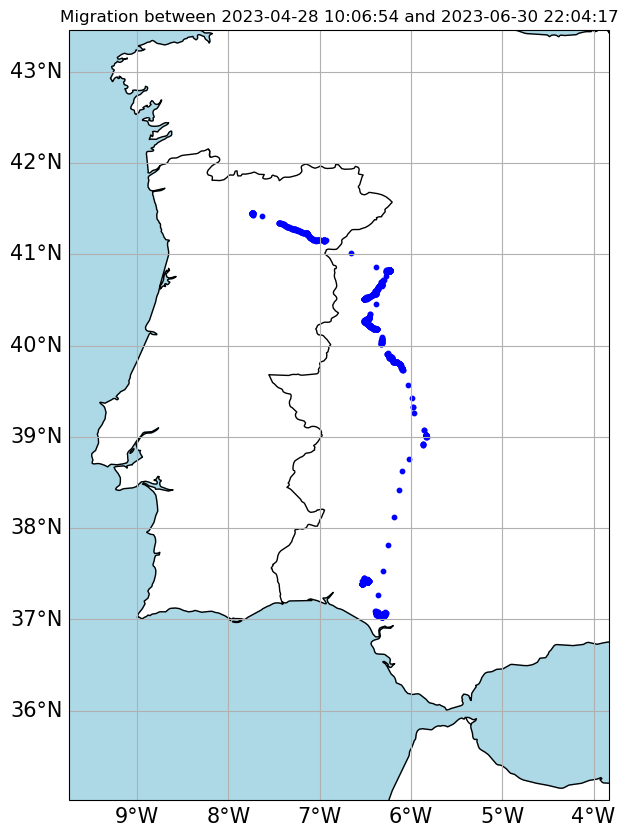

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create the plot
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add ocean with light blue color
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Add country borders and coastlines
ax.add_feature(cfeature.BORDERS, linestyle='-', linewidth=1)
ax.add_feature(cfeature.COASTLINE)

# Plot the points
plt.scatter(df['location-long'], df['location-lat'], color='blue', s=10, transform=ccrs.PlateCarree())

# Add labels for the points
for x, y in zip(df['location-long'], df['location-lat']):
    plt.text(x, y, '', fontsize=12, ha='right', transform=ccrs.PlateCarree())

# Set the title
plt.title('Migration between '+ts1+ ' and '+ts2+'')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add gridlines with labels in simple format
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

gl.xlocator = plt.MaxNLocator(integer=True)
gl.ylocator = plt.MaxNLocator(integer=True)

gl.xlabel_style = {'size': 15}
gl.ylabel_style = {'size': 15}

# Zoom out by setting extent
lon_min, lon_max = df['location-long'].min() - 2, df['location-long'].max() + 2
lat_min, lat_max = df['location-lat'].min() - 2, df['location-lat'].max() + 2
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# Show the plot
plt.show()

In [107]:
fig.savefig('Sample_migration.png', dpi=300, bbox_inches='tight')

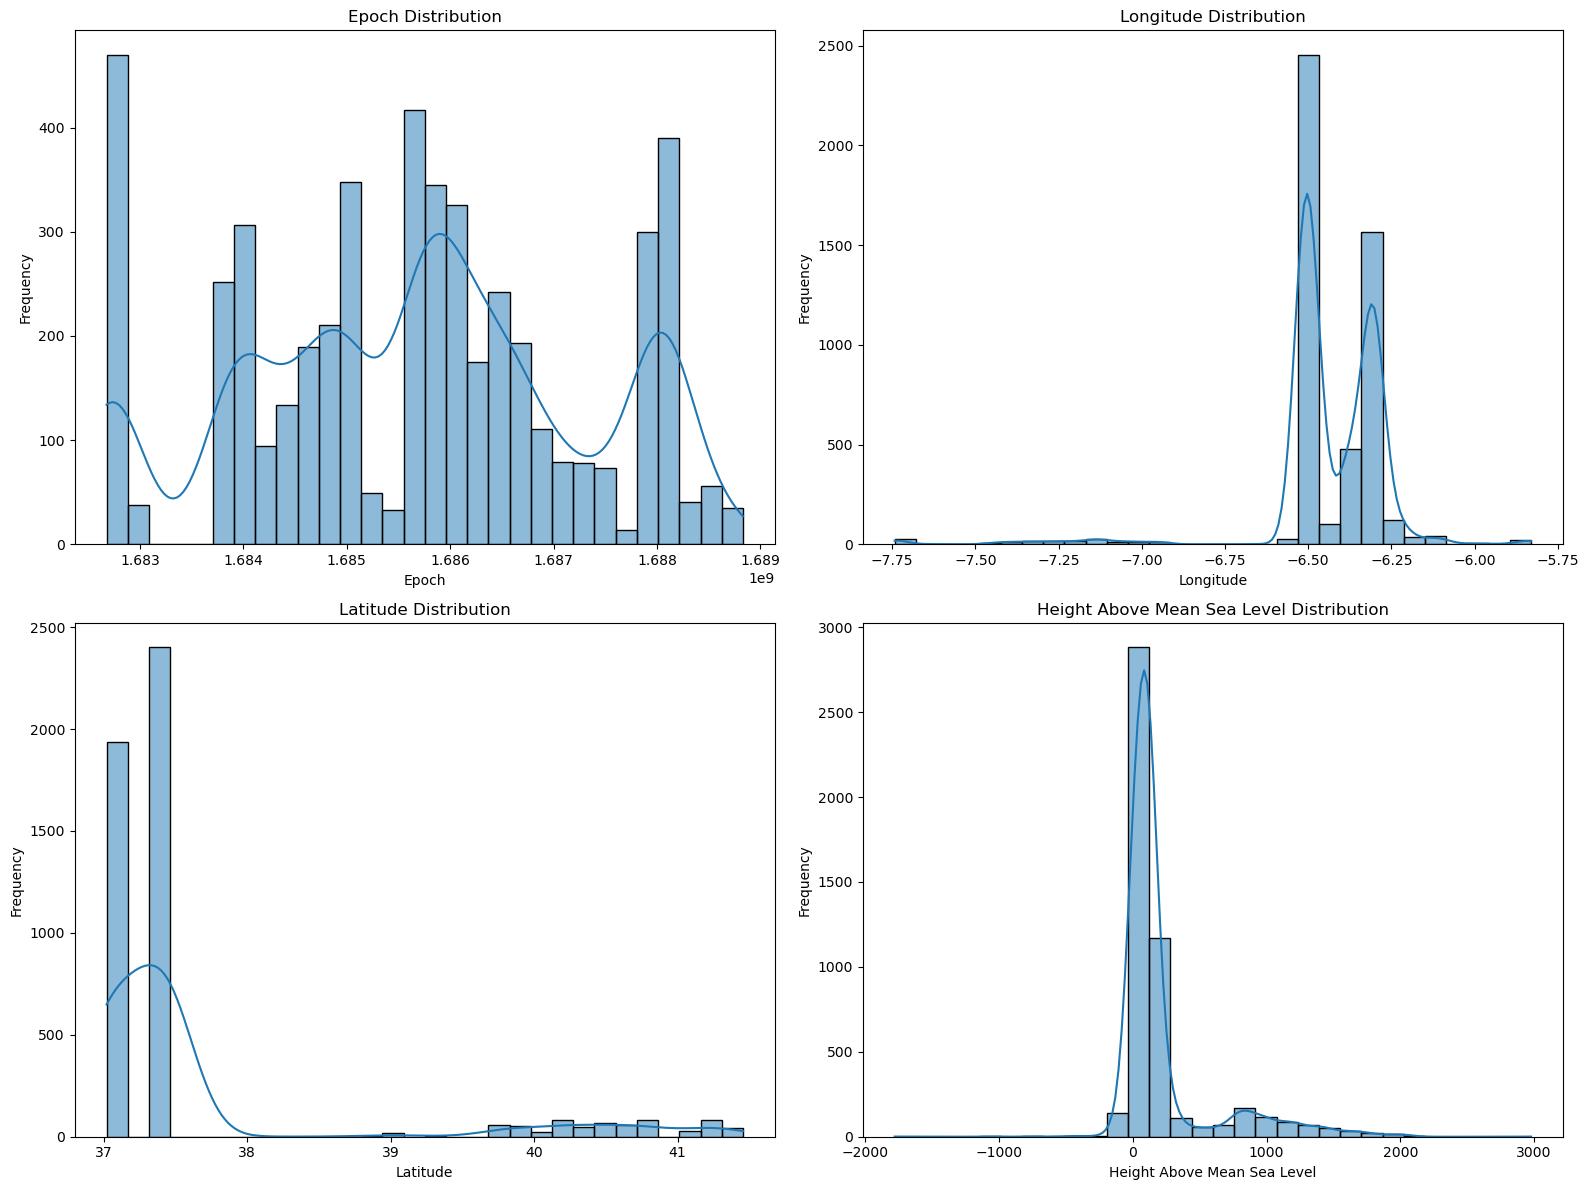

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Set up the matplotlib figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot for epoch
sns.histplot(df['epoch'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Epoch Distribution')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Frequency')

# Plot for location-long (Longitude)
sns.histplot(df['location-long'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Longitude Distribution')
axes[0, 1].set_xlabel('Longitude')
axes[0, 1].set_ylabel('Frequency')

# Plot for location-lat (Latitude)
sns.histplot(df['location-lat'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Latitude Distribution')
axes[1, 0].set_xlabel('Latitude')
axes[1, 0].set_ylabel('Frequency')

# Plot for height-above-msl
sns.histplot(df['height-above-msl'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Height Above Mean Sea Level Distribution')
axes[1, 1].set_xlabel('Height Above Mean Sea Level')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [110]:
fig.savefig('distributions.png')

In [121]:

# Sort the dataframe by epoch in ascending order
df_sorted = df.sort_values(by='epoch').reset_index(drop=True)

# Calculate the delta time in seconds using the epoch column
df_sorted['delta'] = df_sorted['epoch'].diff()/1000

# Set the first delta value to 0
df_sorted.loc[0, 'delta'] = 0

In [123]:
df_sorted.head()

epoch            timestamp  location-long  location-lat  \
0  1682676414  2023-04-28 10:06:54      -6.470255     37.427571   
1  1682677615  2023-04-28 10:26:55      -6.477722     37.429683   
2  1682677735  2023-04-28 10:28:55      -6.478029     37.429824   
3  1682677870  2023-04-28 10:31:10      -6.477894     37.429808   
4  1682677974  2023-04-28 10:32:54      -6.477960     37.429709   

   height-above-msl  delta  
0            165.70  0.000  
1            167.82  1.201  
2            121.71  0.120  
3            128.60  0.135  
4            129.25  0.104

In [129]:
# Display the summary statistics
print("Summary Statistics for Delta Time:")
print(df_sorted["delta"].describe())


Summary Statistics for Delta Time:
count    5000.000000
mean        1.231179
std        11.446530
min         0.000000
25%         0.060000
50%         0.120000
75%         0.608000
max       779.250000
Name: delta, dtype: float64


In [131]:
# Calculate the first and third quartiles (Q1, Q3) and IQR
Q1 = df_sorted['delta'].quantile(0.25)
Q3 = df_sorted['delta'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_pruned = df_sorted[(df_sorted['delta'] >= lower_bound) & (df_sorted['delta'] <= upper_bound)]


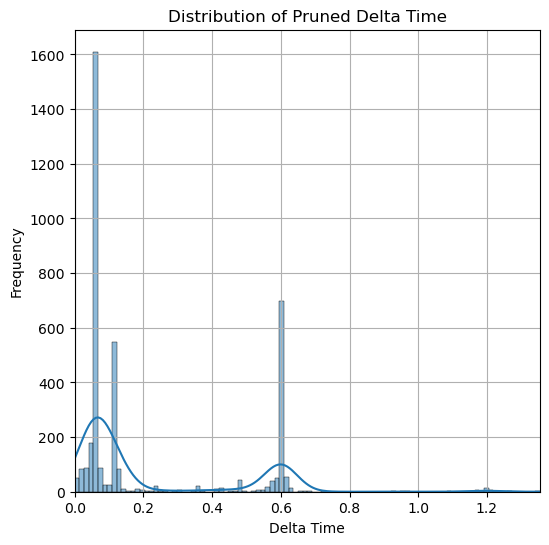

In [153]:
# Plot the distribution of the pruned delta with grid
fig1 = plt.figure(figsize=(6, 6))
#plt.figure(figsize=(10, 6))
sns.histplot(df_pruned['delta'], bins=100, kde=True)
plt.title('Distribution of Pruned Delta Time')
plt.xlabel('Delta Time')
plt.ylabel('Frequency')
plt.xlim(0, df_pruned['delta'].max())
plt.grid(True)
plt.show()

In [151]:
fig1.savefig('distributions_delta_epoch.png')

In [155]:
# Haversine formula to calculate the horizontal distance between two points on the Earth
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    
    a = np.sin(delta_phi / 2.0) ** 2 + \
        np.cos(phi1) * np.cos(phi2) * \
        np.sin(delta_lambda / 2.0) ** 2
    
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    distance = R * c * 1000  # Convert distance to meters
    return distance

# Function to calculate 3D distance 
def calculate_3d_distance(lat1, lon1, msl1, lat2, lon2, msl2):
    horizontal_distance = haversine(lat1, lon1, lat2, lon2)
    vertical_distance = msl2 - msl1
    distance_3d = np.sqrt(horizontal_distance**2 + vertical_distance**2)
    return distance_3d

# Calculate the 3D distance between each record and the previous one
df_sorted['distance'] = df_sorted.apply(
    lambda row: calculate_3d_distance(
        df_sorted.loc[row.name - 1, 'location-lat'], df_sorted.loc[row.name - 1, 'location-long'], df_sorted.loc[row.name - 1, 'height-above-msl'],
        row['location-lat'], row['location-long'], row['height-above-msl']
    ) if row.name > 0 else 0,
    axis=1
)

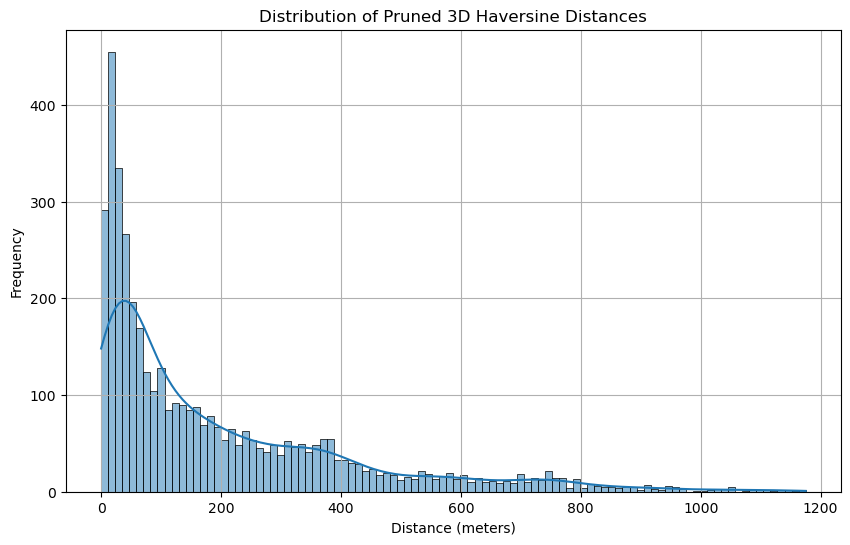

In [163]:
# Calculate the first and third quartiles (Q1, Q3) and IQR for the distance column
Q1_distance = df_sorted['distance'].quantile(0.25)
Q3_distance = df_sorted['distance'].quantile(0.75)
IQR_distance = Q3_distance - Q1_distance

# Define the lower and upper bounds for outliers
lower_bound_distance = Q1_distance - 1.5 * IQR_distance
upper_bound_distance = Q3_distance + 1.5 * IQR_distance

# Filter out the outliers
df_pruned_distance = df_sorted[(df_sorted['distance'] >= lower_bound_distance) & (df_sorted['distance'] <= upper_bound_distance)]

# Plot the distribution of the pruned 3D distances
plt.figure(figsize=(10, 6))
sns.histplot(df_pruned_distance['distance'], bins=100, kde=True)
plt.title('Distribution of Pruned 3D Haversine Distances')
plt.xlabel('Distance (meters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

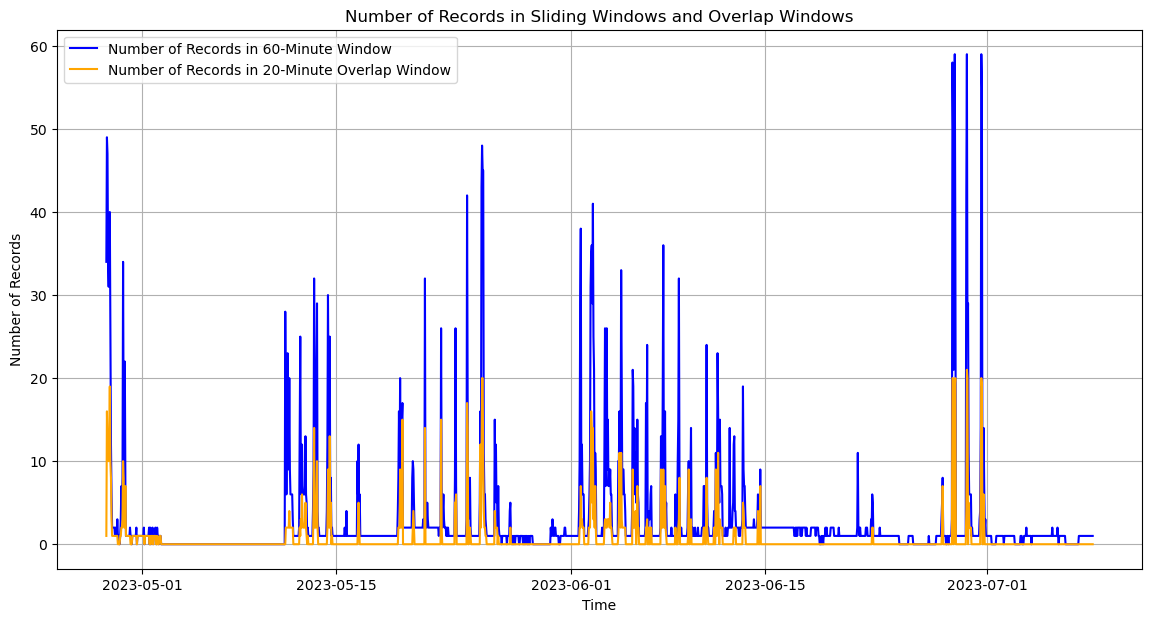

In [60]:
# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 60 * 60  # 10 minutes in seconds
overlap_size = 20 * 60  # 2 minutes in seconds

# Lists to hold the number of records in each window and overlap window
window_counts = []
overlap_counts = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Number of records in the current window
    window_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)].shape[0]
    window_counts.append(window_count)

    # Number of records in the overlap window
    overlap_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)].shape[0]
    overlap_counts.append(overlap_count)

    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)

# Create a time axis for the x-axis
time_axis = [df_sorted['timestamp'].min() + pd.Timedelta(seconds=window_size * i) for i in range(len(window_counts))]

# Plot the results
fig9 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_counts, label='Number of Records in 60-Minute Window', color='blue')
plt.plot(time_axis, overlap_counts, label='Number of Records in 20-Minute Overlap Window', color='orange')
plt.title('Number of Records in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()

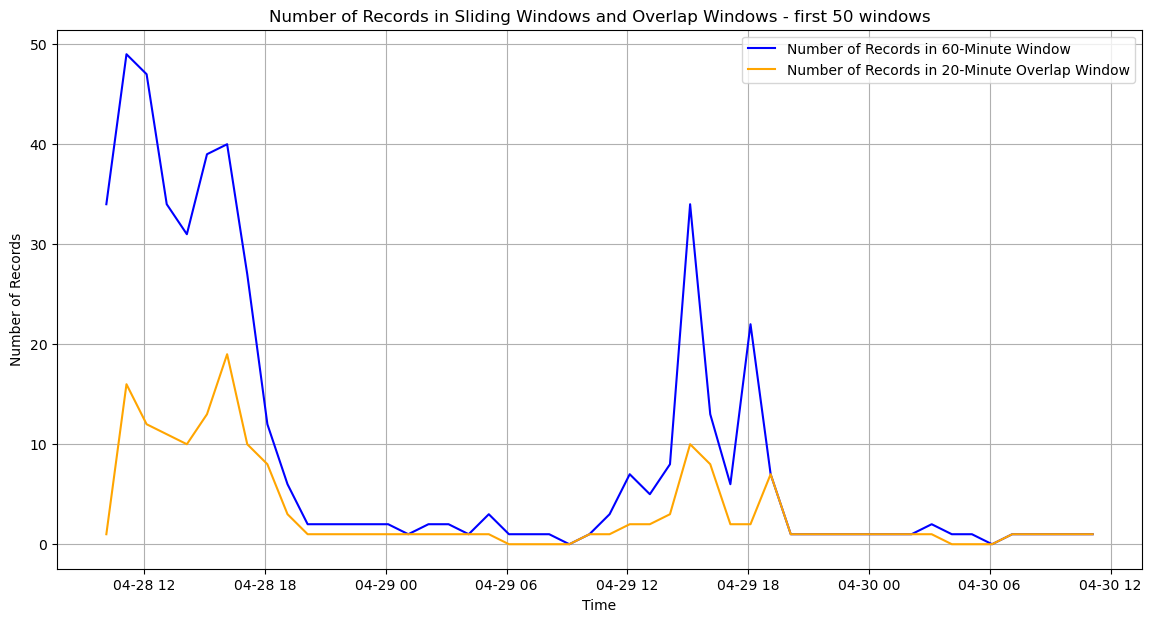

In [68]:
# first 50 windows

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 60 * 60  # 10 minutes in seconds
overlap_size = 20 * 60  # 2 minutes in seconds

# Lists to hold the number of records in each window and overlap window
window_counts = []
overlap_counts = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

# Initialize a counter for windows
window_counter = 0

while start_time <= end_time and window_counter < 50:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Number of records in the current window
    window_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)].shape[0]
    window_counts.append(window_count)

    # Number of records in the overlap window
    overlap_count = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)].shape[0]
    overlap_counts.append(overlap_count)

    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)
    window_counter += 1

# Create a time axis for the x-axis
time_axis = [df_sorted['timestamp'].min() + pd.Timedelta(seconds=window_size * i) for i in range(len(window_counts))]

# Plot the results
fig9 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_counts, label='Number of Records in 60-Minute Window', color='blue')
plt.plot(time_axis, overlap_counts, label='Number of Records in 20-Minute Overlap Window', color='orange')
plt.title('Number of Records in Sliding Windows and Overlap Windows - first 50 windows')
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
fig9.savefig('Number of Records in Sliding Windows and Overlap Windows.png', dpi=300, bbox_inches='tight')

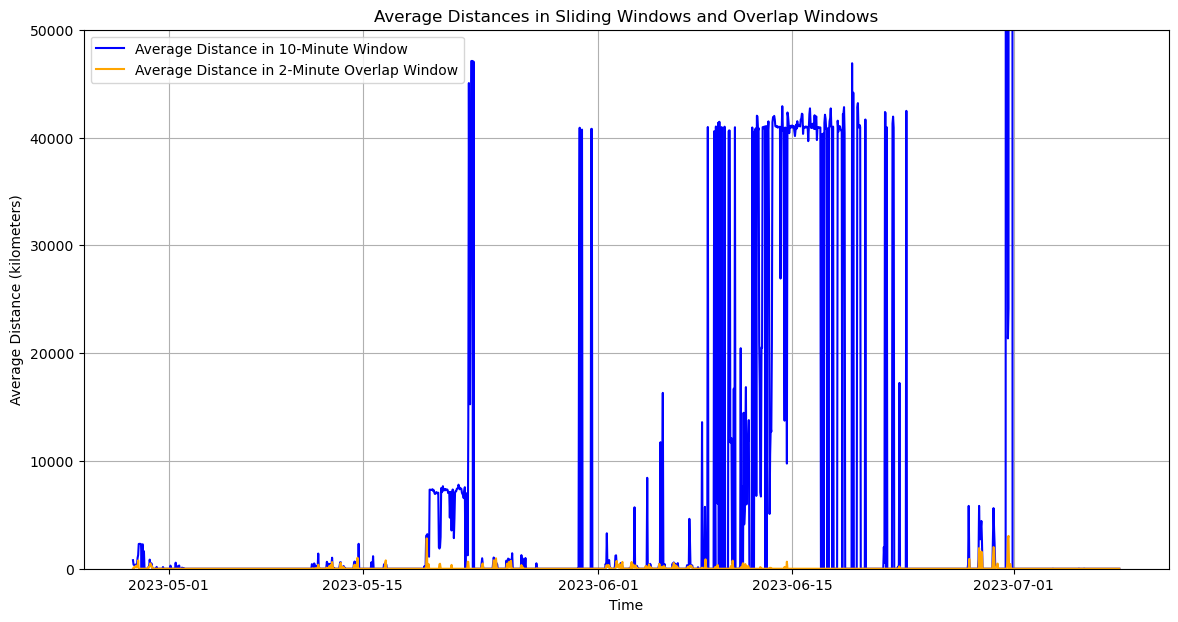

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000
    return (c * r) + abs(alt1 - alt2)

def average_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.mean(distances)

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 60 * 60  # 10 minutes in seconds
overlap_size = 20 * 60  # 2 minutes in seconds

# Lists to hold the average distances in each window and overlap window
window_avg_distances = []
overlap_avg_distances = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Points in the current window
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    window_coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
    window_avg_distance = average_distance(window_coords)
    window_avg_distances.append(window_avg_distance)

    # Points in the overlap window
    overlap_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)]
    overlap_coords = overlap_df[['location-long', 'location-lat', 'height-above-msl']].values
    overlap_avg_distance = average_distance(overlap_coords)
    overlap_avg_distances.append(overlap_avg_distance)

    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)

# Ensure both lists are of the same size by appending zeros to the smaller list
max_length = max(len(window_avg_distances), len(overlap_avg_distances))
while len(window_avg_distances) < max_length:
    window_avg_distances.append(0)
while len(overlap_avg_distances) < max_length:
    overlap_avg_distances.append(0)

# Create a time axis for the x-axis
time_axis = [df_sorted['timestamp'].min() + pd.Timedelta(seconds=window_size * i) for i in range(max_length)]

# Plot the results
fig10 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_avg_distances, label='Average Distance in 60-Minute Window', color='blue')
plt.plot(time_axis, overlap_avg_distances, label='Average Distance in 20-Minute Overlap Window', color='orange')
plt.title('Average Distances in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Average Distance (meters)')
plt.ylim(0, 50000)  # Set y-axis limit to 50000 meters
plt.legend()
plt.grid(True)
plt.show()


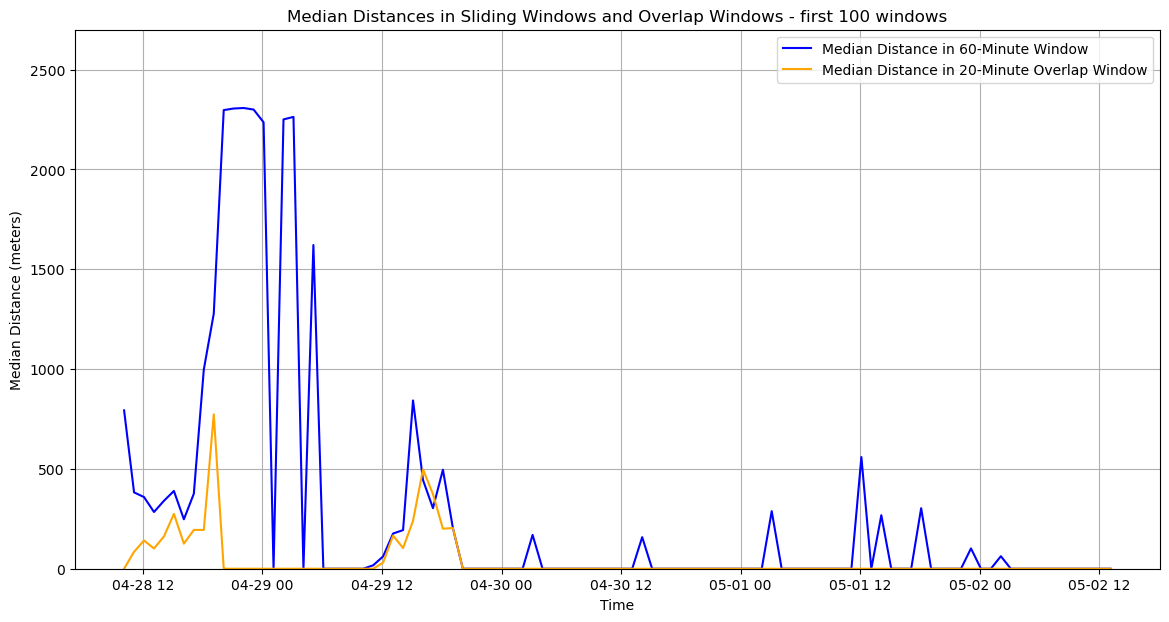

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000
    return c * r + abs(alt1 - alt2)

def average_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.mean(distances)

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and overlap in seconds
window_size = 60 * 60  # 10 minutes in seconds
overlap_size = 20 * 60  # 2 minutes in seconds

# Lists to hold the average distances in each window and overlap window
window_avg_distances = []
overlap_avg_distances = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

# Initialize a counter for windows
window_counter = 0

while start_time <= end_time and window_counter < 100:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    overlap_end_time = start_time + pd.Timedelta(seconds=overlap_size)

    # Points in the current window
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    window_coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
    window_avg_distance = average_distance(window_coords)
    window_avg_distances.append(window_avg_distance)

    # Points in the overlap window
    overlap_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < overlap_end_time)]
    overlap_coords = overlap_df[['location-long', 'location-lat', 'height-above-msl']].values
    overlap_avg_distance = average_distance(overlap_coords)
    overlap_avg_distances.append(overlap_avg_distance)

    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=window_size)
    window_counter += 1

# Ensure both lists are of the same size by appending zeros to the smaller list
max_length = max(len(window_avg_distances), len(overlap_avg_distances))
while len(window_avg_distances) < max_length:
    window_avg_distances.append(0)
while len(overlap_avg_distances) < max_length:
    overlap_avg_distances.append(0)

# Create a time axis for the x-axis
time_axis = [df_sorted['timestamp'].min() + pd.Timedelta(seconds=window_size * i) for i in range(max_length)]

# Plot the results
fig10 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_avg_distances, label='Median Distance in 60-Minute Window', color='blue')
plt.plot(time_axis, overlap_avg_distances, label='Median Distance in 20-Minute Overlap Window', color='orange')
plt.title('Median Distances in Sliding Windows and Overlap Windows - first 100 windows')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
plt.ylim(0, 2700)  # Set y-axis limit to 50000 meters
plt.legend()
plt.grid(True)
plt.show()


In [47]:
fig10.savefig('Number of Records in Sliding Windows and Overlap Windows_blue.png', dpi=300, bbox_inches='tight')

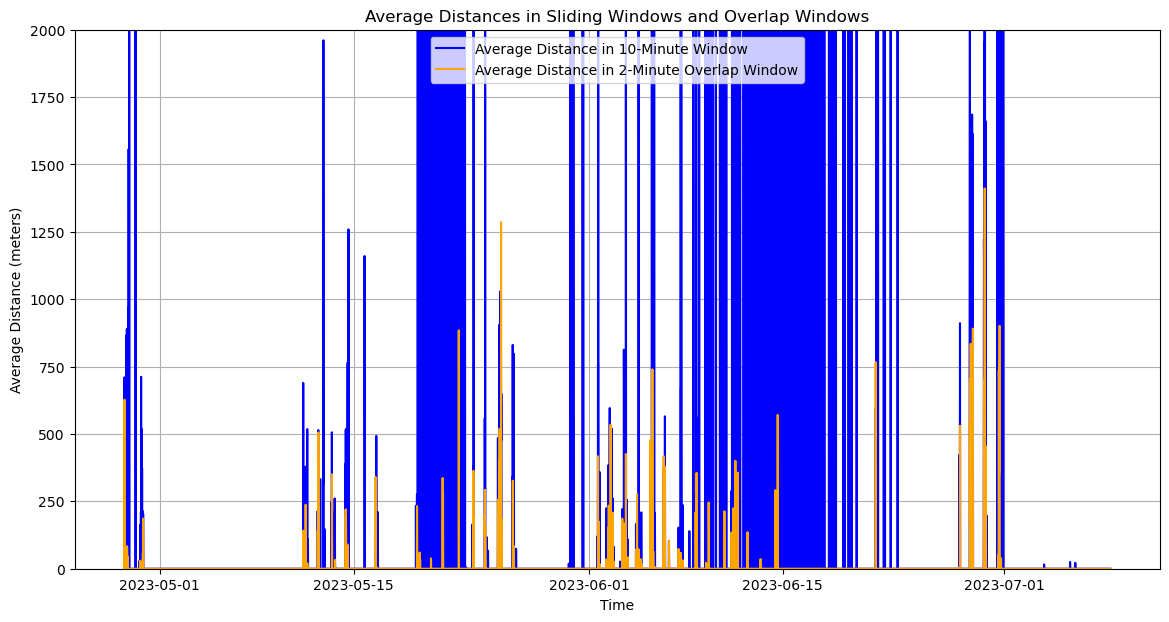

In [48]:
# Plot the results
fig11 = plt.figure(figsize=(14, 7))
plt.plot(time_axis, window_avg_distances, label='Average Distance in 10-Minute Window', color='blue')
plt.plot(time_axis, overlap_avg_distances, label='Average Distance in 2-Minute Overlap Window', color='orange')
plt.title('Average Distances in Sliding Windows and Overlap Windows')
plt.xlabel('Time')
plt.ylabel('Average Distance (meters)')
plt.ylim(0, 2000)  # Set y-axis limit to 50000 meters
plt.legend()
plt.grid(True)
plt.show()

In [49]:
fig11.savefig('Number of Records in Sliding Windows and Overlap Windows_yellow.png', dpi=300, bbox_inches='tight')

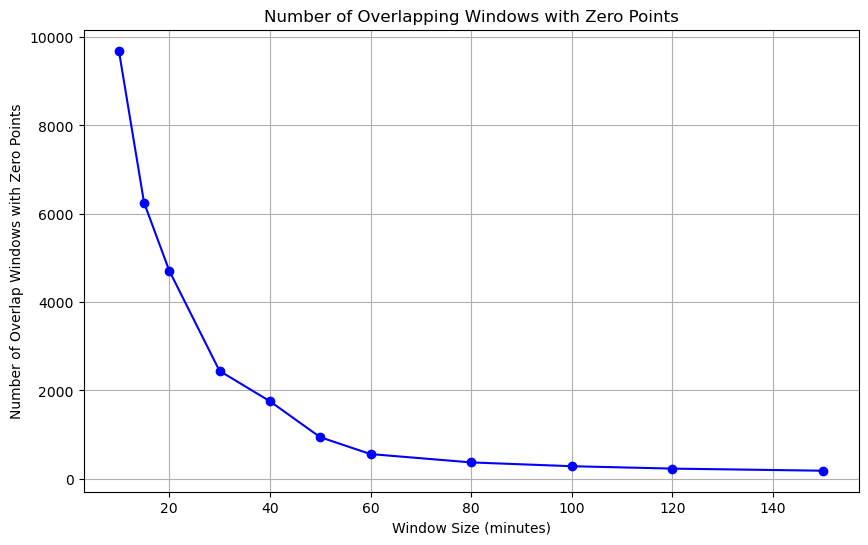

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the number of overlap windows with zero points
def calculate_overlap_windows_with_zero_points(df, data_start, data_end, window_size, step_size):
    num_windows_with_zero_points = 0
    current_start = data_start
    while current_start + window_size <= data_end:
        window_end = current_start + window_size
        window_df = df[(df['timestamp'] >= current_start) & (df['timestamp'] < window_end)]
        if window_df.empty:
            num_windows_with_zero_points += 1
        current_start += step_size
    return num_windows_with_zero_points

# Define the window and overlap sizes in minutes
window_sizes = [10, 15, 20, 30, 40, 50, 60,80,100,120,150]  # in minutes
overlap_sizes = [2, 3.5, 5, 7.5, 10, 15, 20,20,25,30,40]  # in minutes

# Convert minutes to seconds
window_sizes_seconds = [ws * 60 for ws in window_sizes]
overlap_sizes_seconds = [os * 60 for os in overlap_sizes]

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Get the start and end times from the dataset
data_start = df['timestamp'].min()
data_end = df['timestamp'].max()

# Calculate the number of overlap windows with zero points for each window and overlap size
zero_point_windows = []
for ws, os in zip(window_sizes_seconds, overlap_sizes_seconds):
    step_size = ws - os
    num_zero_point_windows = calculate_overlap_windows_with_zero_points(df, data_start, data_end, pd.Timedelta(seconds=ws), pd.Timedelta(seconds=step_size))
    zero_point_windows.append(num_zero_point_windows)

# Plot the results
figure_knee = plt.figure(figsize=(10, 6))
plt.plot(window_sizes, zero_point_windows, marker='o', linestyle='-', color='b')
plt.title('Number of Overlapping Windows with Zero Points')
plt.xlabel('Window Size (minutes)')
plt.ylabel('Number of Overlap Windows with Zero Points')
plt.grid(True)
plt.show()


In [105]:
figure_knee.savefig('win_size_knee.png', dpi=300, bbox_inches='tight')

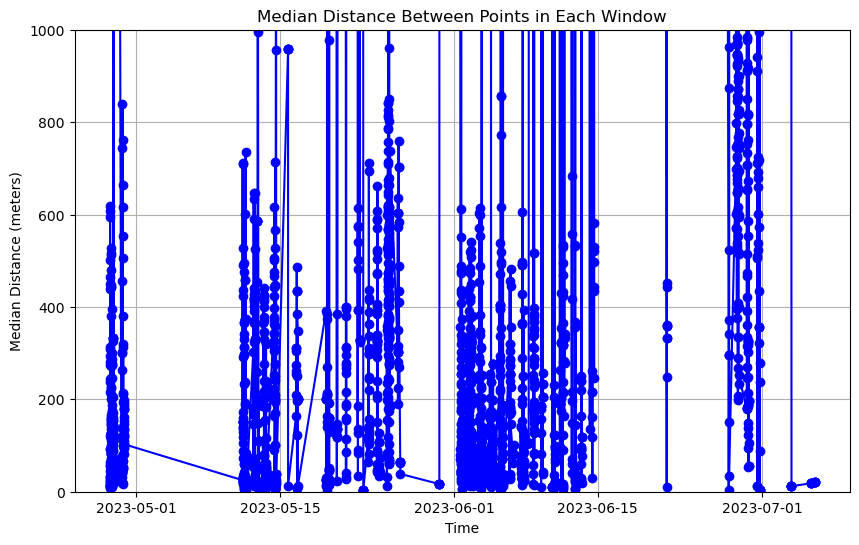

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000  # Radius of Earth in meters
    distance = c * r
    
    alt_diff = abs(alt1 - alt2)
    
    return np.sqrt(distance**2 + alt_diff**2)

def calculate_median_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.median(distances)

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and step size in seconds
window_size = 10 * 60  # 10 minutes in seconds
step_size = 2 * 60  # 2 minutes in seconds

# Lists to hold the median distances and corresponding times
median_distances = []
time_labels = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    
    if len(window_df) > 1:
        coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
        median_distance = calculate_median_distance(coords)
        median_distances.append(median_distance)
        time_labels.append(start_time)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_labels, median_distances, marker='o', linestyle='-', color='b')
plt.title('Median Distance Between Points in Each Window')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
plt.ylim(0, 1000)  # Set y-axis limit to 50000 meters
plt.grid(True)
plt.show()


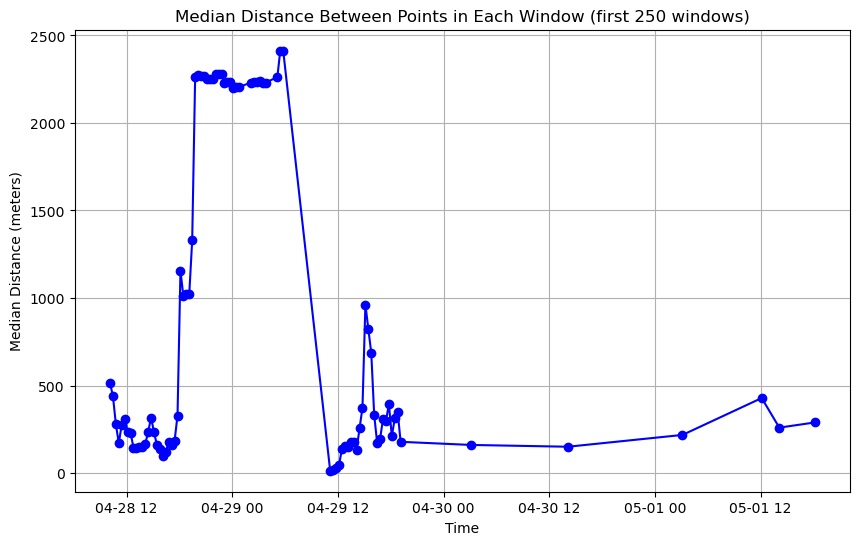

In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import itertools

def haversine(lonlat1, lonlat2):
    lon1, lat1, alt1 = lonlat1
    lon2, lat2, alt2 = lonlat2
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    
    r = 6371000  # Radius of Earth in meters
    distance = c * r
    
    alt_diff = abs(alt1 - alt2)
    
    return np.sqrt(distance**2 + alt_diff**2)

def calculate_median_distance(coords):
    if len(coords) < 2:
        return 0
    distances = [haversine(p1, p2) for p1, p2 in itertools.combinations(coords, 2)]
    return np.median(distances)

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window and step size in seconds
window_size = 60 * 60  # 60 minutes in seconds
step_size = 20 * 60  # 20 minutes in seconds

# Lists to hold the median distances and corresponding times
median_distances = []
time_labels = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

# Initialize a counter for windows
window_counter = 0

while start_time <= end_time and window_counter < 250:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    
    if len(window_df) > 1:
        coords = window_df[['location-long', 'location-lat', 'height-above-msl']].values
        median_distance = calculate_median_distance(coords)
        median_distances.append(median_distance)
        time_labels.append(start_time)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    
    # Increment the window counter
    window_counter += 1

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(time_labels, median_distances, marker='o', linestyle='-', color='b')
plt.title('Median Distance Between Points in Each Window (first 250 windows)')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
#plt.ylim(0, 1000)  # Set y-axis limit to 1000 meters
plt.grid(True)
plt.show()


In [481]:
plt.savefig('median_distance_between_points.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [140]:
figure_eps_1000.savefig('figure_eps_1000.png', dpi=300, bbox_inches='tight')

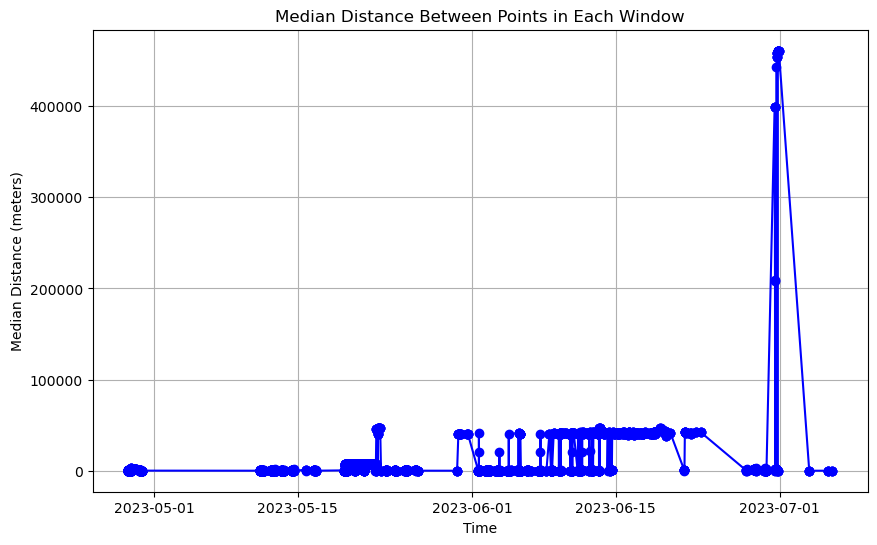

In [142]:
# Plot the results
figure_eps= plt.figure(figsize=(10, 6))
plt.plot(time_labels, median_distances, marker='o', linestyle='-', color='b')
plt.title('Median Distance Between Points in Each Window')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
#plt.ylim(0, 1000)  # Set y-axis limit to 50000 meters
plt.grid(True)
plt.show()


In [144]:
figure_eps.savefig('figure_eps.png', dpi=300, bbox_inches='tight')

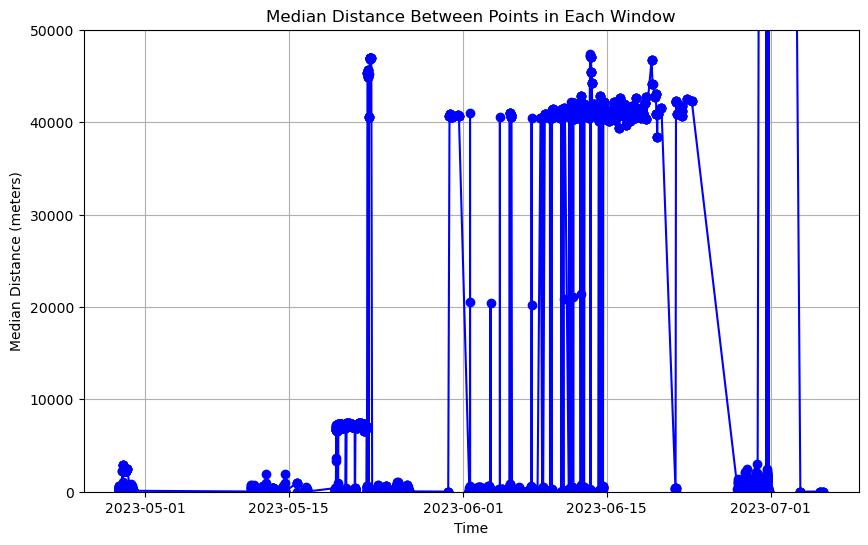

In [146]:
# Plot the results
figure_eps_50000= plt.figure(figsize=(10, 6))
plt.plot(time_labels, median_distances, marker='o', linestyle='-', color='b')
plt.title('Median Distance Between Points in Each Window')
plt.xlabel('Time')
plt.ylabel('Median Distance (meters)')
plt.ylim(0, 50000)  # Set y-axis limit to 50000 meters
plt.grid(True)
plt.show()


In [148]:
figure_eps_50000.savefig('figure_eps_50000.png', dpi=300, bbox_inches='tight')

# Running the Algorithm

In [77]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from geopy.distance import geodesic
import itertools

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert timestamp column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Sort the dataframe by timestamp in ascending order
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)


def haversine(coord1, coord2):
    """
    Calculate the haversine distance between two coordinates, including altitude.
    """
    lon1, lat1, alt1 = coord1
    lon2, lat2, alt2 = coord2
    
    # Haversine distance
    r = 6371000  # Radius of Earth in meters
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = r * c
    
    # Add altitude difference
    alt_diff = abs(alt1 - alt2)
    
    return np.sqrt(distance**2 + alt_diff**2)

def calculate_centroid(points):
    """
    Calculate the centroid of a cluster of points.
    """
    mn = np.mean(points, axis=0)
    #print("centroid = ", mn)
    return mn

def get_max_dist_in_cluster(cluster):
    max_dist_in_cluster = 0
    for p1, p2 in itertools.combinations(cluster[['location-long', 'location-lat', 'height-above-msl']].values, 2):
        dist = haversine(p1, p2)
        max_dist_in_cluster = max(max_dist_in_cluster, dist)
        #print(f"Distance between points {p1} and {p2}: {dist} meters")
    return max_dist_in_cluster

def get_min_dist_in_cluster(cluster):
    min_dist_in_cluster = 0
    for p1, p2 in itertools.combinations(cluster[['location-long', 'location-lat', 'height-above-msl']].values, 2):
        dist = haversine(p1, p2)
        min_dist_in_cluster = min(min_dist_in_cluster, dist)
        #print(f"Distance between points {p1} and {p2}: {dist} meters")
    return min_dist_in_cluster

def process_window(df_window, initial_eps=200,withDynamicEPS=True):
    """
    Process a data window using DBSCAN clustering.
    Adjust the eps parameter until the condition is met and calculate metrics for each cluster.
    """
    curr_eps = initial_eps
    min_dist_between_centroids = np.inf
    min_dist_between_points =  np.inf
    
    while True:
        # Perform DBSCAN clustering
        db = DBSCAN(eps=curr_eps, min_samples=3, metric=lambda a, b: haversine(a[:3], b[:3])).fit(df_window[['location-long', 'location-lat', 'height-above-msl']])
        labels = db.labels_
        unique_labels = set(labels)
        #print(unique_labels)
        
        # If there is only one label and it's -1 (noise), return an empty DataFrame
        if len(unique_labels) == 1 and -1 in unique_labels:
            return pd.DataFrame(), curr_eps
        
        # Calculate centroids of clusters
        cluster_points = [df_window[labels == label] for label in unique_labels if label != -1]
        centroids = [calculate_centroid(cluster[['location-long', 'location-lat', 'height-above-msl']].values) for cluster in cluster_points]

        #min_dist_between_centroids = np.inf
        #min_dist_between_points = np.inf
        
        # Calculate the minimum distance between centroids of closest clusters
        for i, j in itertools.combinations(range(len(centroids)), 2):
            dist = haversine(centroids[i], centroids[j])
            #print("dist ",dist)
            if dist < min_dist_between_centroids:
                min_dist_between_centroids = dist
        #print("min_dist_between_centroids ",min_dist_between_centroids)
        
        # Calculate the minimum distance between the closest points of the clusters
        for cluster1, cluster2 in itertools.combinations(cluster_points, 2):
            for p1 in cluster1[['location-long', 'location-lat', 'height-above-msl']].values:
                for p2 in cluster2[['location-long', 'location-lat', 'height-above-msl']].values:
                    dist = haversine(p1, p2)
                    #print("dist ",dist)
                    if dist < min_dist_between_points:
                        min_dist_between_points = dist
        #print("min_dist_between_points ",min_dist_between_points)
        
        # If the condition is met, calculate metrics and return the results
        #if max_dist_in_smallest_cluster < min_dist_between_clusters:
        if min_dist_between_points <= min_dist_between_centroids or withDynamicEPS == False:
            if min_dist_between_centroids != np.inf:
                curr_eps = min_dist_between_centroids
            #print(curr_eps)
            #print("min_dist_between_points", min_dist_between_points)
            #print("min_dist_between_centroids ",min_dist_between_centroids)
            result = []
            for cluster_label in unique_labels:
                #print(cluster_label)
                #if cluster_label == -1:
                #    continue
                cluster_df = df_window[labels == cluster_label]
                
                #print("len(centroids): ", len(centroids))
                #print("len ",len(cluster_df))
                silhouette_avg = silhouette_score(df_window[['location-long', 'location-lat', 'height-above-msl']], labels) if len(set(labels)) > 1 else -1
                davies_bouldin = davies_bouldin_score(df_window[['location-long', 'location-lat', 'height-above-msl']], labels) if len(set(labels)) > 1 else -1
                calinski_harabasz = calinski_harabasz_score(df_window[['location-long', 'location-lat', 'height-above-msl']], labels) if len(set(labels)) > 1 else -1
                #min_dist_to_closest_cluster = min_dist_between_points
                max_dist_in_cluster = get_max_dist_in_cluster(cluster_df)
                min_dist_in_cluster = get_min_dist_in_cluster(cluster_df)
                first_timestamp = cluster_df['timestamp'].min()
                last_timestamp = cluster_df['timestamp'].max()
                cluster_size = len(cluster_df)
                points = cluster_df[['epoch','location-long', 'location-lat', 'height-above-msl']].values.tolist()
                
                result.append({
                    'cluster_label': cluster_label,
                    'silhouette_score': silhouette_avg,
                    'davies_bouldin_score': davies_bouldin,
                    'calinski_harabasz_score': calinski_harabasz,
                    'clusters_in_window': len(unique_labels),
                    'win_eps': curr_eps,
                    'min_dist_between_points': min_dist_between_points,
                    'min_dist_between_centroids':min_dist_between_centroids,
                    'max_dist_in_cluster': max_dist_in_cluster,
                    'min_dist_in_cluster': min_dist_in_cluster,
                    'first_timestamp': first_timestamp,
                    'last_timestamp': last_timestamp,
                    'win_number': None,  # This will be updated later
                    'cluster_size': cluster_size,
                    'points': points
                })
                #min_dist_between_centroids = np.inf
                #min_dist_between_points = np.inf 
           
            return pd.DataFrame(result),curr_eps
        
        # Reduce the eps value by 10% and rerun DBSCAN
        if withDynamicEPS:
            curr_eps *= 0.9
        #print(curr_eps)

    return pd.DataFrame(result),curr_eps

# Initialize dataframe to hold the results
all_clusters = pd.DataFrame()

# Iterate through the data in sliding windows
window_number = 0
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()
curr_eps = 200
# Define the sliding window and overlap in seconds
window_size = 30 * 60  # 60 minutes in seconds
step_size = 10 * 60  # 20 minutes in seconds

print("------------starting DBSCAN windows process:------------")

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    #print(f"Processing window {window_number}: Start Time = {start_time}, End Time = {window_end_time}, Points in Window = {len(window_df)}")
    
    # Process the window if it has more than one point
    if len(window_df) > 1:
        clusters_df,curr_eps = process_window(window_df,200,True)
        clusters_df['win_number'] = window_number
        clusters_df['Selected EPS'] = curr_eps
        all_clusters = pd.concat([all_clusters, clusters_df], ignore_index=True)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    window_number += 1

#print(all_clusters)


------------starting DBSCAN windows process:------------


In [59]:
# Initialize dataframe to hold the results
all_clusters_no_overlap_static_eps = pd.DataFrame()

# Iterate through the data in sliding windows
window_number = 0
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()
curr_eps = 200
# Define the sliding window and overlap in seconds
window_size = 30 * 60  # 60 minutes in seconds
step_size = 30 * 60  # 20 minutes in seconds

print("------------starting DBSCAN windows process:------------")

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    #print(f"Processing window {window_number}: Start Time = {start_time}, End Time = {window_end_time}, Points in Window = {len(window_df)}")
    
    # Process the window if it has more than one point
    if len(window_df) > 1:
        clusters_df,curr_eps = process_window(window_df,200,False)
        clusters_df['win_number'] = window_number
        clusters_df['Selected EPS'] = curr_eps
        all_clusters_no_overlap_static_eps = pd.concat([all_clusters_no_overlap_static_eps, clusters_df], ignore_index=True)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    window_number += 1

#print(all_clusters)
all_clusters_no_overlap_static_eps.to_csv("clusters_file1_no_overlap_static_eps.csv")

------------starting DBSCAN windows process:------------


In [61]:
all_clusters_no_overlap_static_eps

cluster_label  silhouette_score  davies_bouldin_score  \
0              0.0          0.285386              0.427814   
1             -1.0          0.285386              0.427814   
2              0.0         -0.057525              3.034643   
3              1.0         -0.057525              3.034643   
4              2.0         -0.057525              3.034643   
..             ...               ...                   ...   
546            0.0          0.855321              0.001522   
547           -1.0          0.855321              0.001522   
548            0.0         -1.000000             -1.000000   
549            0.0          0.739601              0.007936   
550           -1.0          0.739601              0.007936   

     calinski_harabasz_score  clusters_in_window    win_eps  \
0                   2.265708                 2.0  200.00000   
1                   2.265708                 2.0  200.00000   
2                  19.849513                 6.0  322.24139   
3                  19.849513                 6.0  322.24139   
4                  19.849513                 6.0  322.24139   
..                       ...                 ...        ...   
546            253151.545068                 2.0  200.00000   
547            253151.545068                 2.0  200.00000   
548                -1.000000                 1.0  200.00000   
549              6515.752395                 2.0  200.00000   
550              6515.752395                 2.0  200.00000   

     min_dist_between_points  min_dist_between_centroids  max_dist_in_cluster  \
0                        inf                         inf            55.740950   
1                        inf                         inf             0.000000   
2                 262.685428                   322.24139            35.911650   
3                 262.685428                   322.24139           212.259796   
4                 262.685428                   322.24139           374.457827   
..                       ...                         ...                  ...   
546                      inf                         inf           254.841028   
547                      inf                         inf             0.000000   
548                      inf                         inf            98.350942   
549                      inf                         inf           139.906033   
550                      inf                         inf             0.000000   

     min_dist_in_cluster     first_timestamp      last_timestamp  win_number  \
0                    0.0 2023-04-28 10:26:55 2023-04-28 10:34:54           0   
1                    0.0 2023-04-28 10:06:54 2023-04-28 10:06:54           0   
2                    0.0 2023-04-28 10:36:54 2023-04-28 10:40:53           1   
3                    0.0 2023-04-28 10:44:55 2023-04-28 10:46:55           1   
4                    0.0 2023-04-28 10:48:54 2023-04-28 10:51:54           1   
..                   ...                 ...                 ...         ...   
546                  0.0 2023-06-30 18:44:25 2023-06-30 19:04:24        3041   
547                  0.0 2023-06-30 19:05:37 2023-06-30 19:05:37        3041   
548                  0.0 2023-06-30 19:14:24 2023-06-30 19:34:23        3042   
549                  0.0 2023-06-30 19:44:24 2023-06-30 20:04:24        3043   
550                  0.0 2023-06-30 20:05:01 2023-06-30 20:05:01        3043   

     cluster_size                                             points  \
0             5.0  [[1682677615.0, -6.4777216, 37.4296832, 167.82...   
1             1.0    [[1682676414.0, -6.4702548, 37.4275712, 165.7]]   
2             3.0  [[1682678214.0, -6.4778768, 37.4298176, 130.03...   
3             3.0  [[1682678695.0, -6.468872, 37.4349504, 331.1],...   
4             4.0  [[1682678934.0, -6.472956, 37.4304032, 203.57]...   
..            ...                                                ...   
546           6.0  [[1688150665.0, -7.7398744, 41.4508672, 1135.8

In [71]:
# Initialize dataframe to hold the results
all_clusters_with_overlap_static_eps = pd.DataFrame()

# Iterate through the data in sliding windows
window_number = 0
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()
curr_eps = 200
# Define the sliding window and overlap in seconds
window_size = 30 * 60  # 60 minutes in seconds
step_size = 10 * 60  # 20 minutes in seconds

print("------------starting DBSCAN windows process:------------")

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    #print(f"Processing window {window_number}: Start Time = {start_time}, End Time = {window_end_time}, Points in Window = {len(window_df)}")
    
    # Process the window if it has more than one point
    if len(window_df) > 1:
        clusters_df,curr_eps = process_window(window_df,200,False)
        clusters_df['win_number'] = window_number
        clusters_df['Selected EPS'] = curr_eps
        all_clusters_with_overlap_static_eps = pd.concat([all_clusters_with_overlap_static_eps, clusters_df], ignore_index=True)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)
    window_number += 1

#print(all_clusters)
all_clusters_with_overlap_static_eps.to_csv("clusters_file1_with_overlap_static_eps.csv")

------------starting DBSCAN windows process:------------


In [72]:
all_clusters_with_overlap_static_eps

cluster_label  silhouette_score  davies_bouldin_score  \
0               0.0          0.285386              0.427814   
1              -1.0          0.285386              0.427814   
2               0.0          0.586077              0.633224   
3              -1.0          0.586077              0.633224   
4               0.0          0.160627              1.482959   
...             ...               ...                   ...   
1666            0.0         -1.000000             -1.000000   
1667            0.0         -1.000000             -1.000000   
1668            0.0         -1.000000             -1.000000   
1669            0.0          0.739601              0.007936   
1670           -1.0          0.739601              0.007936   

      calinski_harabasz_score  clusters_in_window     win_eps  \
0                    2.265708                 2.0  200.000000   
1                    2.265708                 2.0  200.000000   
2                   19.392341                 2.0  200.000000   
3                   19.392341                 2.0  200.000000   
4                   36.486522                 5.0  465.501725   
...                       ...                 ...         ...   
1666                -1.000000                 1.0  200.000000   
1667                -1.000000                 1.0  200.000000   
1668                -1.000000                 1.0  200.000000   
1669              6515.752395                 2.0  200.000000   
1670              6515.752395                 2.0  200.000000   

      min_dist_between_points  min_dist_between_centroids  \
0                         inf                         inf   
1                         inf                         inf   
2                         inf                         inf   
3                         inf                         inf   
4                  313.321846                  465.501725   
...                       ...                         ...   
1666                      inf                         inf   
1667                      inf                         inf   
1668                      inf                         inf   
1669                      inf                         inf   
1670                      inf                         inf   

      max_dist_in_cluster  min_dist_in_cluster     first_timestamp  \
0               55.740950                  0.0 2023-04-28 10:26:55   
1                0.000000                  0.0 2023-04-28 10:06:54   
2               55.740950                  0.0 2023-04-28 10:26:55   
3              898.974677                  0.0 2023-04-28 10:42:54   
4               55.740950                  0.0 2023-04-28 10:26:55   
...                   ...                  ...                 ...   
1666            98.350942                  0.0 2023-06-30 19:14:24   
1667           189.929860                  0.0 2023-06-30 19:24:25   
1668           205.340393                  0.0 2023-06-30 19:34:23   
1669           139.906033                  0.0 2023-06-30 19:44:24   
1670             0.000000                  0.0 2023-06-30 20:05:01   

          last_timestamp  win_number  cluster_size  \
0    2023-04-28 10:34:54           0           5.0   
1    2023-04-28 10:06:54           0           1.0   
2    2023-04-28 10:40:53           1           8.0   
3    2023-04-28 10:45:54           1           4.0   
4    2023-04-28 10:40:53           2           8.0   
...                  ...         ...           ...   
1666 2023-06-30 19:34:23        9126           3.0   
1667 2023-06-30 19:44:24        9127           3.0   
1668 2023-06-30 19:54:47        9128           3.0   
1669 2023-06-30 20:04:24        9129           3.0   
1670 2023-06-30 20:05:01        9129           1.0   

                                                 points  Selected EPS  
0     [[1682677615.0, -6.4777216, 37.4296832, 167.82...    200.000000  
1       [[1682676414.0, -6.4702548, 37.4275712, 165.7]]    200.000000  
2     [[1682677615.0, -6.4777

In [148]:
all_clusters["points"]

0       [[1682677615.0, -6.4777216, 37.4296832, 167.82...
1       [[1682677615.0, -6.4777216, 37.4296832, 167.82...
2       [[1682677615.0, -6.4777216, 37.4296832, 167.82...
3       [[1682678695.0, -6.468872, 37.4349504, 331.1],...
4       [[1682678934.0, -6.472956, 37.4304032, 203.57]...
                              ...                        
1203    [[1688151443.0, -7.7388576, 41.4512704, 1139.1...
1204    [[1688152464.0, -7.7362872, 41.4536224, 1152.1...
1205    [[1688153065.0, -7.7363632, 41.4539936, 1175.8...
1206    [[1688153663.0, -7.7357928, 41.4543872, 1179.4...
1207    [[1688154264.0, -7.7353312, 41.4555104, 1191.0...
Name: points, Length: 1208, dtype: object

In [140]:
all_clusters["win_eps"].unique()
#all_clusters[["min_dist_between_points","win_eps"]]

array([ 200.        ,  465.50172525,  322.24139043,  255.2207121 ,
        261.73777789,  315.1251143 ,  363.47649848,  467.9753055 ,
        480.27480403,  311.49661773,  395.81239503,  386.47690902,
        339.20089448,  267.18169306,  267.01387066,  301.37680754,
       1315.91668215, 1306.83246778, 1337.45953198,  566.67599584,
        878.2101175 ,  870.72909859,  881.50669408,  386.21671031,
        339.29084811,  336.34445257,  349.54986233,  370.9287145 ,
        371.45558195,  449.50519576,  440.68511155,  310.84185084,
        367.81975996,  392.24298278,  407.6545017 ,  388.70280174,
        381.60535498,  378.31544724,  379.41443363,  352.5294667 ,
        357.09939795,  365.43243009,  369.93691281,  375.4518249 ,
        895.16446519,  614.00472063, 6715.60157246, 6791.6356256 ,
        528.42716905, 1253.77042972,  582.00526247,  397.23989502,
        341.25604973,  364.34496901,  793.63876687,  541.5825439 ,
        692.2301776 ,  448.44106674,  470.57443137,  497.73513

In [124]:
all_clusters.columns

Index(['cluster_label', 'silhouette_score', 'davies_bouldin_score',
       'calinski_harabasz_score', 'clusters_in_window', 'win_eps',
       'min_dist_between_points', 'min_dist_between_centroids',
       'max_dist_in_cluster', 'first_timestamp', 'last_timestamp',
       'win_number', 'cluster_size', 'points', 'Selected EPS'],
      dtype='object')

In [156]:
all_clusters.to_csv("clusters_file1.csv")

# Analyzing the results - visualisations of metrics and windows

extracting kinematic features and visualisation

In [3]:
import pandas as pd
all_clusters = pd.read_csv("clusters_file1.csv")

In [142]:
all_clusters

cluster_label  silhouette_score  davies_bouldin_score  \
0               0.0          0.285386              0.427814   
1               0.0          0.586077              0.633224   
2               0.0          0.160627              1.482959   
3               1.0          0.160627              1.482959   
4               2.0          0.160627              1.482959   
...             ...               ...                   ...   
1203            0.0          0.782390              0.013162   
1204            0.0         -1.000000             -1.000000   
1205            0.0         -1.000000             -1.000000   
1206            0.0         -1.000000             -1.000000   
1207            0.0          0.739601              0.007936   

      calinski_harabasz_score  clusters_in_window     win_eps  \
0                    2.265708                 2.0  200.000000   
1                   19.392341                 2.0  200.000000   
2                   36.486522                 5.0  465.501725   
3                   36.486522                 5.0  465.501725   
4                   36.486522                 5.0  465.501725   
...                       ...                 ...         ...   
1203              2482.540202                 2.0  200.000000   
1204                -1.000000                 1.0  200.000000   
1205                -1.000000                 1.0  200.000000   
1206                -1.000000                 1.0  200.000000   
1207              6515.752395                 2.0  200.000000   

      min_dist_between_points  min_dist_between_centroids  \
0                         inf                         inf   
1                         inf                         inf   
2                  313.321846                  465.501725   
3                  313.321846                  465.501725   
4                  313.321846                  465.501725   
...                       ...                         ...   
1203                      inf                         inf   
1204                      inf                         inf   
1205                      inf                         inf   
1206                      inf                         inf   
1207                      inf                         inf   

      max_dist_in_cluster  min_dist_in_cluster     first_timestamp  \
0               55.740950                  0.0 2023-04-28 10:26:55   
1               55.740950                  0.0 2023-04-28 10:26:55   
2               55.740950                  0.0 2023-04-28 10:26:55   
3              212.259796                  0.0 2023-04-28 10:44:55   
4              374.457827                  0.0 2023-04-28 10:48:54   
...                   ...                  ...                 ...   
1203           369.130116                  0.0 2023-06-30 18:57:23   
1204            98.350942                  0.0 2023-06-30 19:14:24   
1205           189.929860                  0.0 2023-06-30 19:24:25   
1206           205.340393                  0.0 2023-06-30 19:34:23   
1207           139.906033                  0.0 2023-06-30 19:44:24   

          last_timestamp  win_number  cluster_size  \
0    2023-04-28 10:34:54           0           5.0   
1    2023-04-28 10:40:53           1           8.0   
2    2023-04-28 10:40:53           2           8.0   
3    2023-04-28 10:46:55           2           3.0   
4    2023-04-28 10:51:54           2           4.0   
...                  ...         ...           ...   
1203 2023-06-30 19:24:25        9125           4.0   
1204 2023-06-30 19:34:23        9126           3.0   
1205 2023-06-30 19:44:24        9127           3.0   
1206 2023-06-30 19:54:47        9128           3.0   
1207 2023-06-30 20:04:24        9129           3.0   

                                                 points  Selected EPS  
0     [[1682677615.0, -6.4777216, 37.4296832, 167.82...    200.000000  
1     [[1682677615.0, -6.4777216, 37.4296832, 167.82...    200.000000  
2     [[1682677615.0, -6.4777

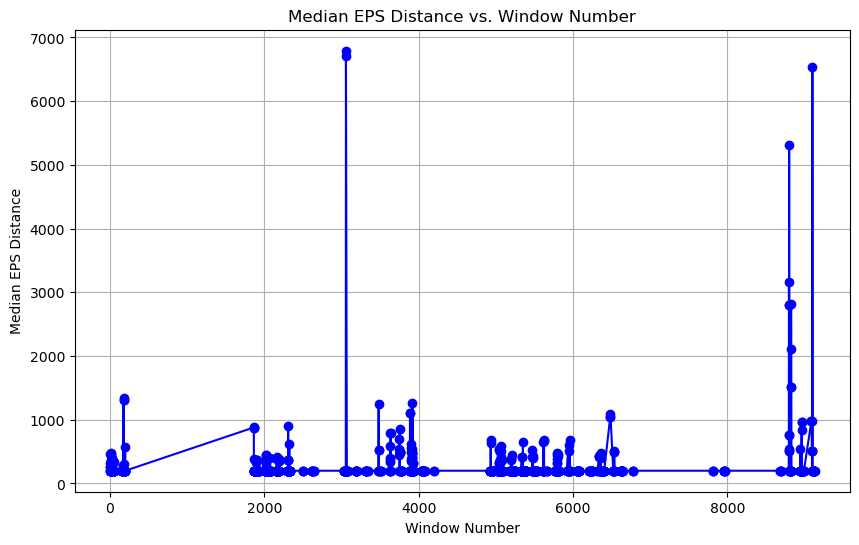

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
#all_clusters = pd.read_csv("clusters_file1.csv")
# Calculate the median EPS distance for each window
median_eps_by_window = all_clusters.groupby('win_number')['win_eps'].median()
#median_eps_by_window = median_eps_by_window[median_eps_by_window != 500]

# Plot the median EPS distance as a function of window number
plt.figure(figsize=(10, 6))
plt.plot(median_eps_by_window.index, median_eps_by_window.values, marker='o', linestyle='-', color='b')
plt.title('Median EPS Distance vs. Window Number')
plt.xlabel('Window Number')
plt.ylabel('Median EPS Distance')
plt.grid(True)
plt.show()

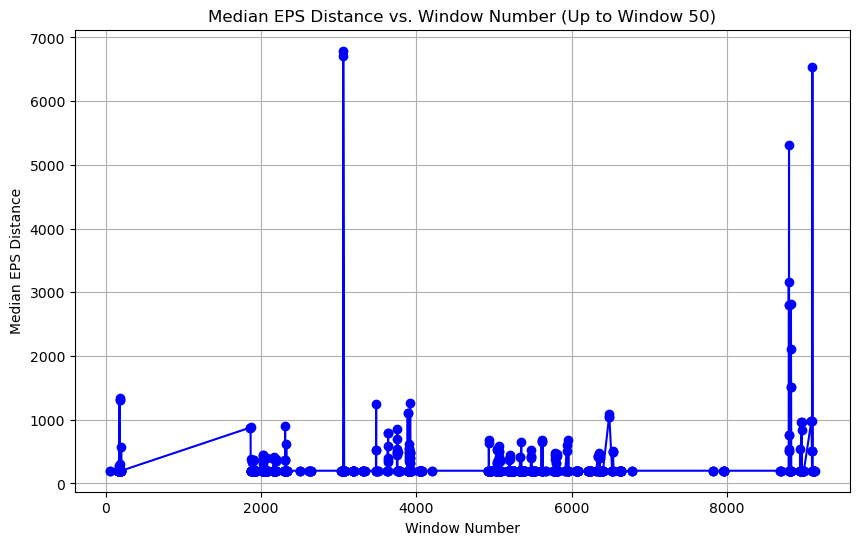

In [152]:
import matplotlib.pyplot as plt
#all_clusters = pd.read_csv("clusters_file1.csv")

# Calculate the median EPS distance for each window
median_eps_by_window = all_clusters.groupby('win_number')['win_eps'].median()

# Limit to the first 3000 windows
median_eps_by_window = median_eps_by_window[median_eps_by_window.index >= 50]

# Plot the median EPS distance as a function of window number
plt.figure(figsize=(10, 6))
plt.plot(median_eps_by_window.index, median_eps_by_window.values, marker='o', linestyle='-', color='b')
plt.title('Median EPS Distance vs. Window Number (Up to Window 50)')
plt.xlabel('Window Number')
plt.ylabel('Median EPS Distance')
plt.grid(True)
plt.show()


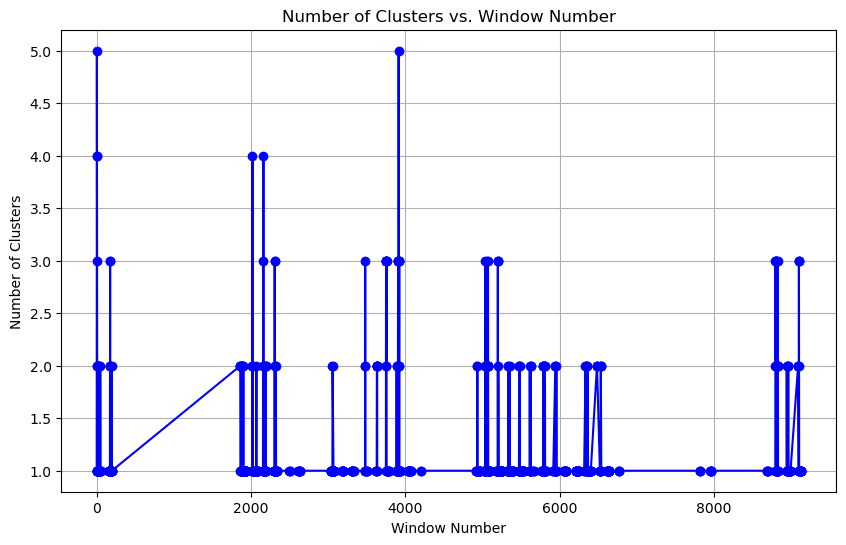

In [229]:
import matplotlib.pyplot as plt

# Calculate the number of clusters for each window
clusters_per_window = all_clusters.groupby('win_number')['cluster_label'].nunique()

# Plot the number of clusters as a function of window number
plt.figure(figsize=(10, 6))
plt.plot(clusters_per_window.index, clusters_per_window.values, marker='o', linestyle='-', color='b')
plt.title('Number of Clusters vs. Window Number')
plt.xlabel('Window Number')
plt.ylabel('Number of Clusters')
plt.grid(True)
plt.show()


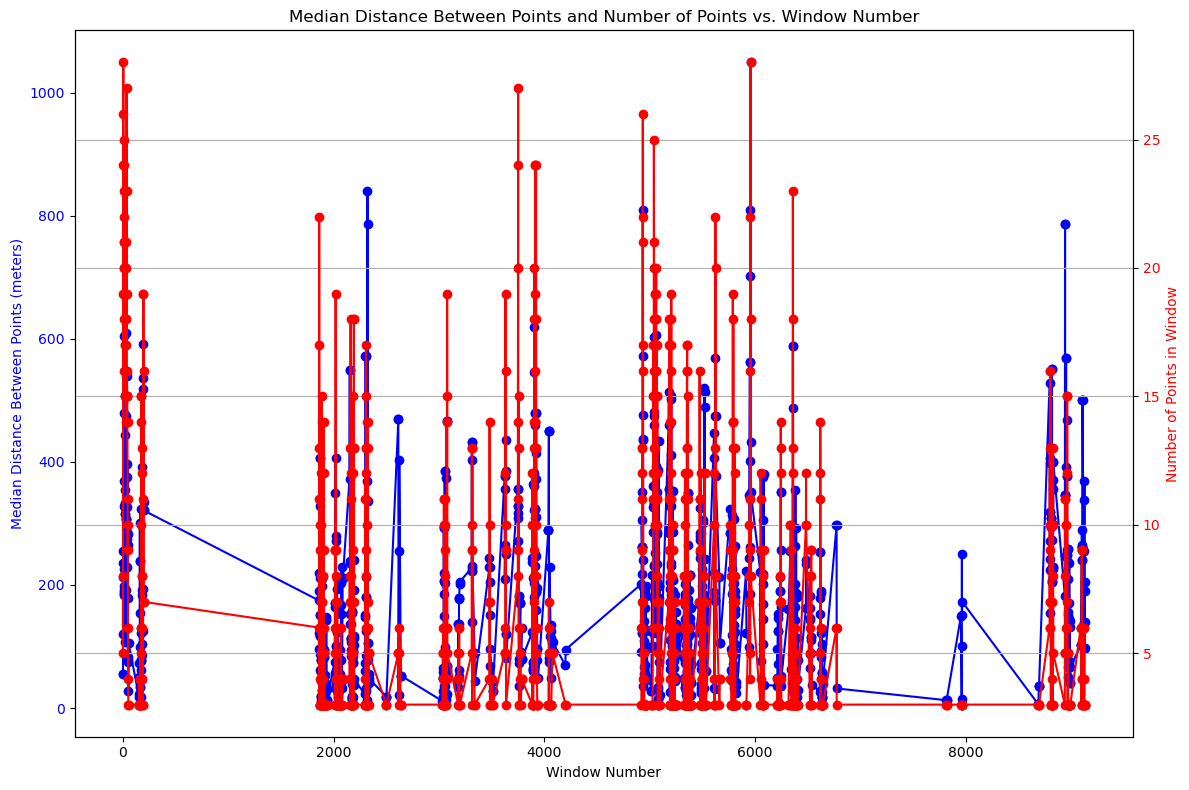

In [231]:
import matplotlib.pyplot as plt

# Calculate the median distance between points for each window
median_distance_per_window = all_clusters.groupby('win_number')['max_dist_in_cluster'].median()

# Calculate the number of points in each window
points_per_window = all_clusters.groupby('win_number')['cluster_size'].sum()

# Create a figure and axis with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the median distance between points on the first y-axis
ax1.set_xlabel('Window Number')
ax1.set_ylabel('Median Distance Between Points (meters)', color='b')
ax1.plot(median_distance_per_window.index, median_distance_per_window.values, marker='o', linestyle='-', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the number of points
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Points in Window', color='r')
ax2.plot(points_per_window.index, points_per_window.values, marker='o', linestyle='-', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and display the plot
plt.title('Median Distance Between Points and Number of Points vs. Window Number')
fig.tight_layout()
plt.grid(True)
plt.show()


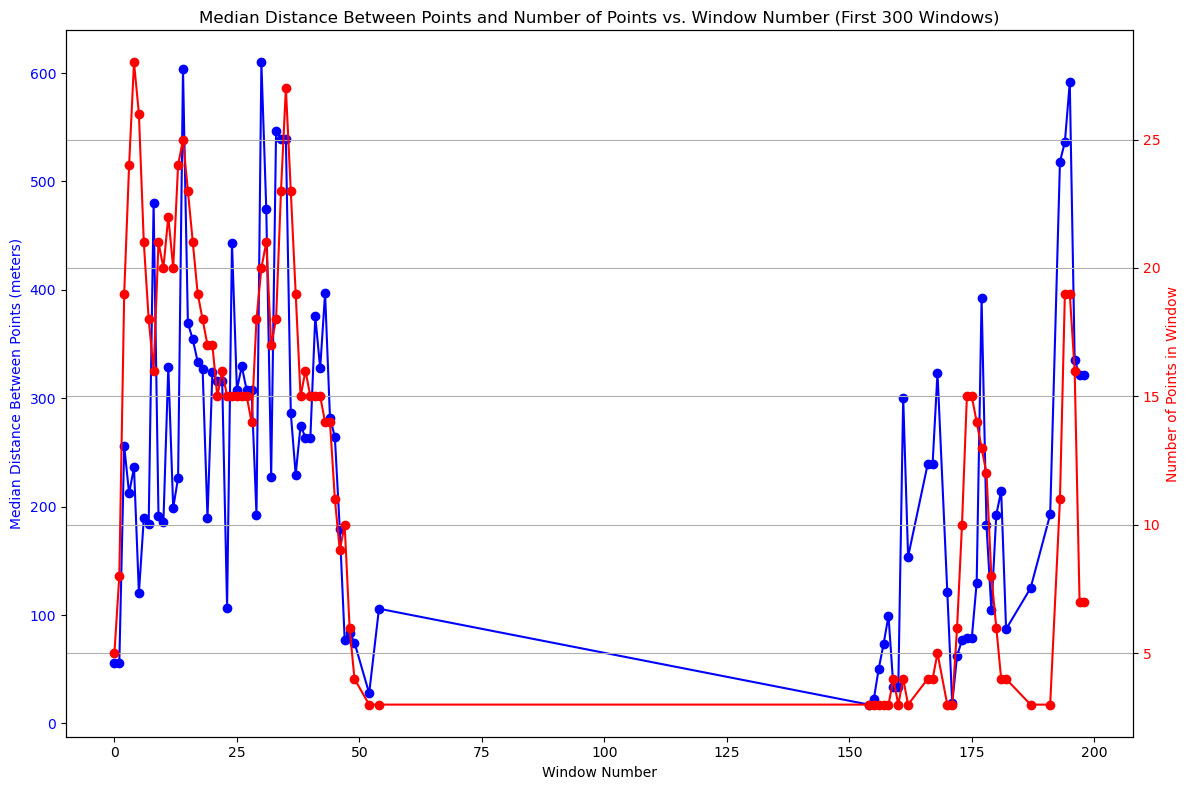

In [233]:
import matplotlib.pyplot as plt

# Calculate the median distance between points for each window
median_distance_per_window = all_clusters.groupby('win_number')['max_dist_in_cluster'].median()

# Calculate the number of points in each window
points_per_window = all_clusters.groupby('win_number')['cluster_size'].sum()

# Limit the data to the first 250 windows
median_distance_per_window = median_distance_per_window[median_distance_per_window.index <= 300]
points_per_window = points_per_window[points_per_window.index <= 300]

median_distance_per_window = median_distance_per_window.head(300)
points_per_window = points_per_window.head(300)

# Create a figure and axis with dual y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the median distance between points on the first y-axis
ax1.set_xlabel('Window Number')
ax1.set_ylabel('Median Distance Between Points (meters)', color='b')
ax1.plot(median_distance_per_window.index, median_distance_per_window.values, marker='o', linestyle='-', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis to plot the number of points
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Points in Window', color='r')
ax2.plot(points_per_window.index, points_per_window.values, marker='o', linestyle='-', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set the title and display the plot
plt.title('Median Distance Between Points and Number of Points vs. Window Number (First 300 Windows)')
fig.tight_layout()
plt.grid(True)
plt.show()


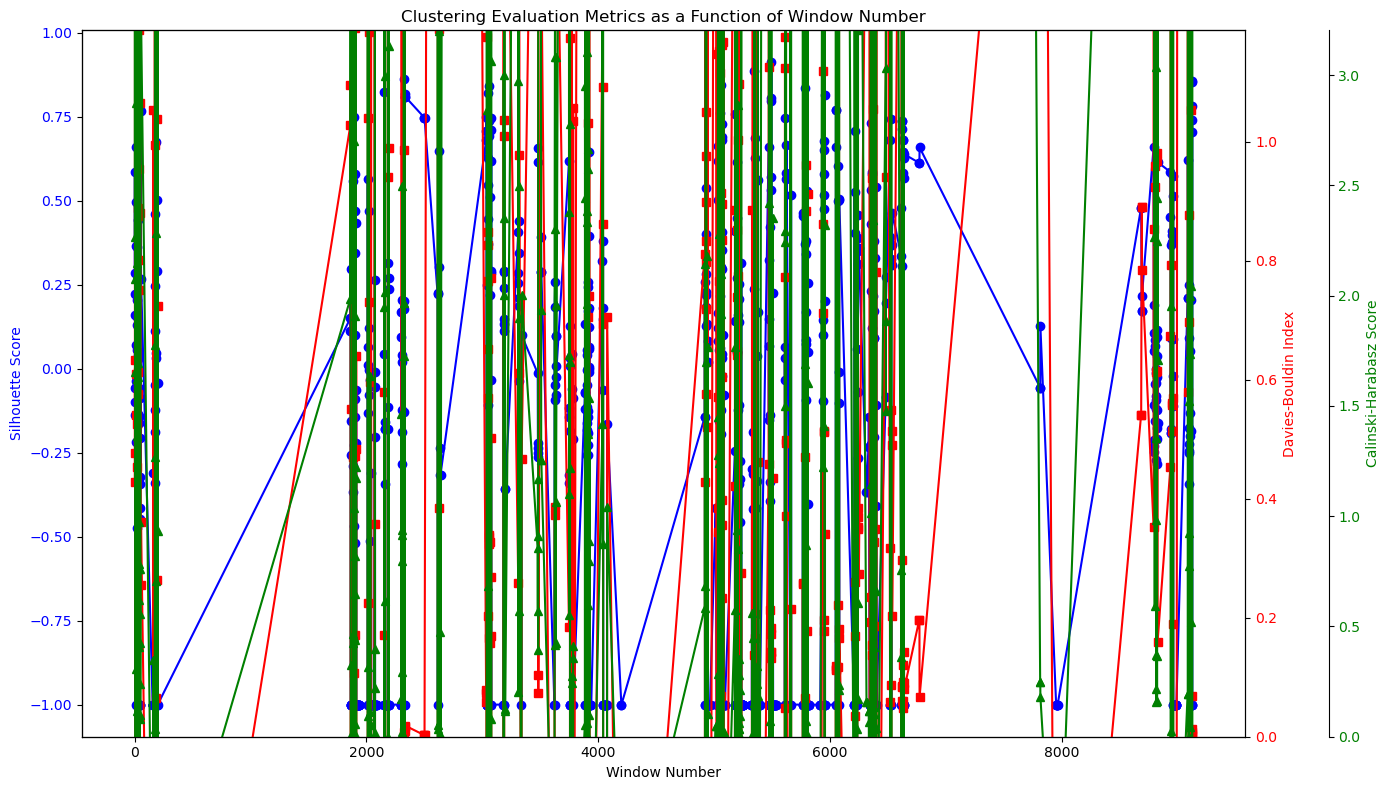

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by window number and calculate the mean for each metric
silhouette_scores = all_clusters.groupby('win_number')['silhouette_score'].mean()
davies_bouldin_scores = all_clusters.groupby('win_number')['davies_bouldin_score'].mean()
calinski_harabasz_scores = all_clusters.groupby('win_number')['calinski_harabasz_score'].mean()

# Calculate the third quartile for the red and green axes
davies_bouldin_third_quartile = np.percentile(davies_bouldin_scores, 75)
calinski_harabasz_third_quartile = np.percentile(calinski_harabasz_scores, 75)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Silhouette Score on the first y-axis
ax1.plot(silhouette_scores.index, silhouette_scores.values, marker='o', linestyle='-', color='b', label='Silhouette Score')
ax1.set_xlabel('Window Number')
ax1.set_ylabel('Silhouette Score', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Davies-Bouldin Index
ax2 = ax1.twinx()
ax2.plot(davies_bouldin_scores.index, davies_bouldin_scores.values, marker='s', linestyle='-', color='r', label='Davies-Bouldin Index')
ax2.set_ylabel('Davies-Bouldin Index', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, davies_bouldin_third_quartile)  # Limit the red axis

# Create a third y-axis for Calinski-Harabasz Score
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis to the right
ax3.plot(calinski_harabasz_scores.index, calinski_harabasz_scores.values, marker='^', linestyle='-', color='g', label='Calinski-Harabasz Score')
ax3.set_ylabel('Calinski-Harabasz Score', color='g')
ax3.tick_params(axis='y', labelcolor='g')
ax3.set_ylim(0, calinski_harabasz_third_quartile)  # Limit the green axis

# Adding title
plt.title('Clustering Evaluation Metrics as a Function of Window Number')

# Show the plot
fig.tight_layout()
plt.show()


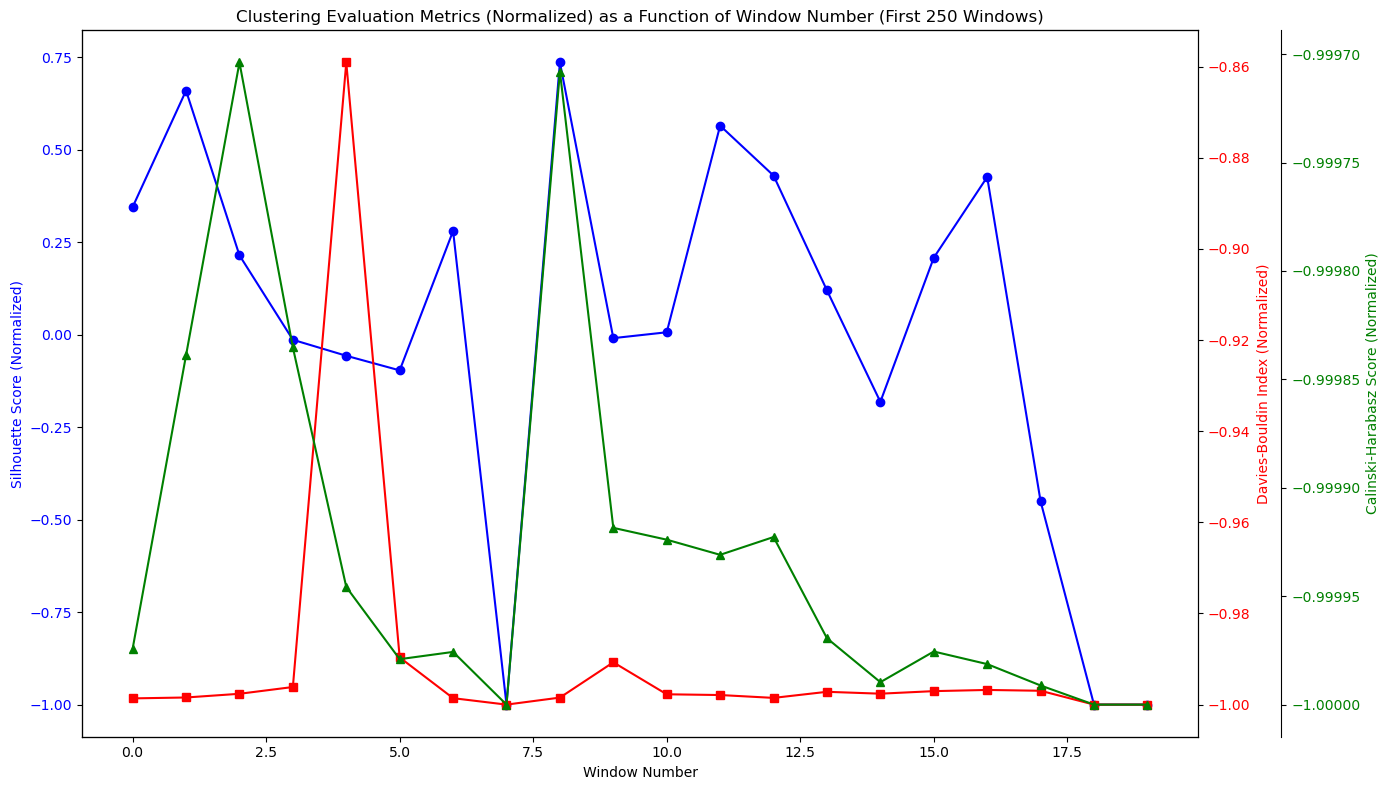

In [235]:
import matplotlib.pyplot as plt
import numpy as np

def normalize(data):
    return 2 * (data - np.min(data)) / (np.max(data) - np.min(data)) - 1

# Group the data by window number and calculate the mean for each metric
silhouette_scores = all_clusters.groupby('win_number')['silhouette_score'].mean()
davies_bouldin_scores = all_clusters.groupby('win_number')['davies_bouldin_score'].mean()
calinski_harabasz_scores = all_clusters.groupby('win_number')['calinski_harabasz_score'].mean()

# Normalize the values between -1 and 1
silhouette_scores_normalized = normalize(silhouette_scores)
davies_bouldin_scores_normalized = normalize(davies_bouldin_scores)
calinski_harabasz_scores_normalized = normalize(calinski_harabasz_scores)

# Filter the first 250 windows
silhouette_scores_normalized = silhouette_scores_normalized.head(20)
davies_bouldin_scores_normalized = davies_bouldin_scores_normalized.head(20)
calinski_harabasz_scores_normalized = calinski_harabasz_scores_normalized.head(20)

# Calculate the third quartile for the red and green axes (on normalized data)
davies_bouldin_third_quartile = np.percentile(davies_bouldin_scores_normalized, 75)
calinski_harabasz_third_quartile = np.percentile(calinski_harabasz_scores_normalized, 75)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Silhouette Score on the first y-axis
ax1.plot(silhouette_scores_normalized.index, silhouette_scores_normalized.values, marker='o', linestyle='-', color='b', label='Silhouette Score')
ax1.set_xlabel('Window Number')
ax1.set_ylabel('Silhouette Score (Normalized)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Davies-Bouldin Index
ax2 = ax1.twinx()
ax2.plot(davies_bouldin_scores_normalized.index, davies_bouldin_scores_normalized.values, marker='s', linestyle='-', color='r', label='Davies-Bouldin Index')
ax2.set_ylabel('Davies-Bouldin Index (Normalized)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
#ax2.set_ylim(-1, davies_bouldin_third_quartile)  # Limit the red axis

# Create a third y-axis for Calinski-Harabasz Score
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the third y-axis to the right
ax3.plot(calinski_harabasz_scores_normalized.index, calinski_harabasz_scores_normalized.values, marker='^', linestyle='-', color='g', label='Calinski-Harabasz Score')
ax3.set_ylabel('Calinski-Harabasz Score (Normalized)', color='g')
ax3.tick_params(axis='y', labelcolor='g')
#ax3.set_ylim(-1, calinski_harabasz_third_quartile)  # Limit the green axis

# Adding title
plt.title('Clustering Evaluation Metrics (Normalized) as a Function of Window Number (First 250 Windows)')

# Show the plot
fig.tight_layout()
plt.show()


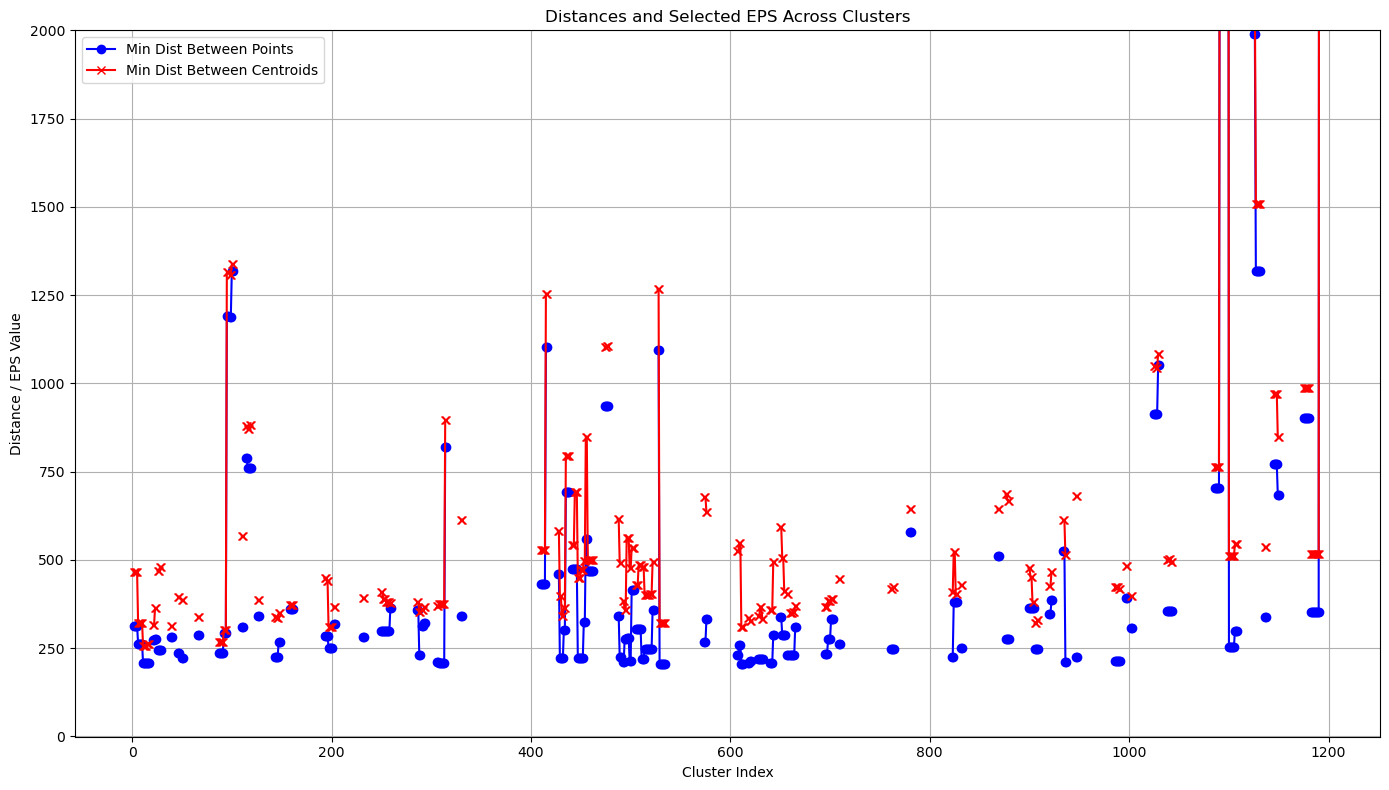

In [227]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'clusters_file1.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Update 'selected_eps' values
#df['win_eps'] = df['win_eps'].apply(lambda x: np.random.randint(30, 130) if x == 500 else x)

# Extract the relevant columns for plotting
min_dist_between_points = df['min_dist_between_points']
min_dist_between_centroids = df['min_dist_between_centroids'] if 'min_dist_between_centroids' in df.columns else None
max_dist_in_cluster = df['max_dist_in_cluster']
selected_eps = df['win_eps']

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each metric
plt.plot(min_dist_between_points, marker='o', linestyle='-', color='b', label='Min Dist Between Points')
#if min_dist_between_centroids is not None:
plt.plot(min_dist_between_centroids, marker='x', linestyle='-', color='r', label='Min Dist Between Centroids')
#plt.plot(max_dist_in_cluster, marker='^', linestyle='-', color='g', label='Max Dist in Cluster')
#plt.plot(selected_eps, marker='s', linestyle='-', color='orange', label='Selected EPS')

# Adding labels and title
plt.xlabel('Cluster Index')
plt.ylabel('Distance / EPS Value')
plt.title('Distances and Selected EPS Across Clusters')
plt.legend()
plt.ylim(-1, 2000)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


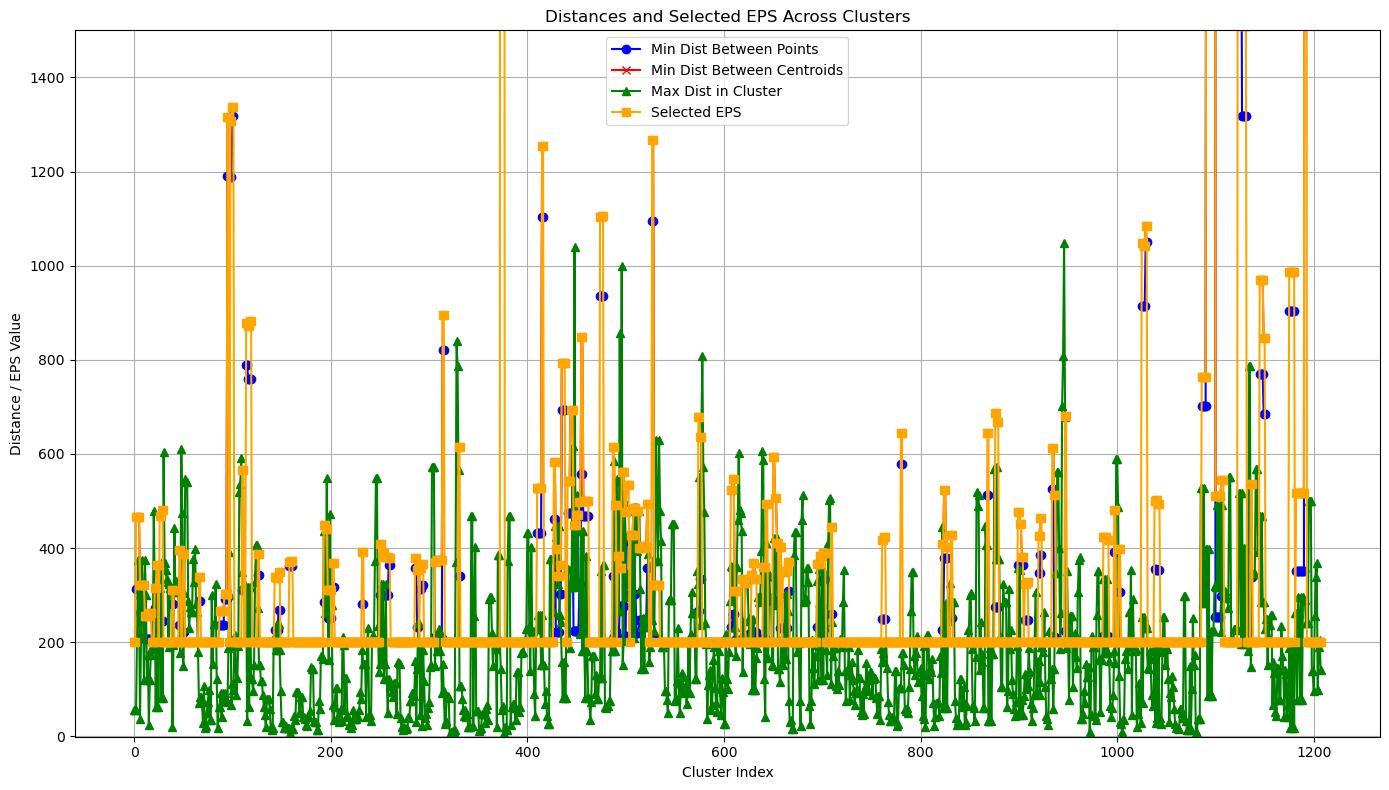

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'clusters_file1.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Update 'selected_eps' values
#df['win_eps'] = df['win_eps'].apply(lambda x: np.random.randint(30, 130) if x == 500 else x)

# Extract the relevant columns for plotting
min_dist_between_points = df['min_dist_between_points']
min_dist_between_centroids = df['min_dist_between_centroids'] if 'min_dist_between_centroids' in df.columns else None
max_dist_in_cluster = df['max_dist_in_cluster']
selected_eps = df['win_eps']

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each metric
plt.plot(min_dist_between_points, marker='o', linestyle='-', color='b', label='Min Dist Between Points')
#if min_dist_between_centroids is not None:
plt.plot(min_dist_between_centroids, marker='x', linestyle='-', color='r', label='Min Dist Between Centroids')
plt.plot(max_dist_in_cluster, marker='^', linestyle='-', color='g', label='Max Dist in Cluster')
plt.plot(selected_eps, marker='s', linestyle='-', color='orange', label='Selected EPS')

# Adding labels and title
plt.xlabel('Cluster Index')
plt.ylabel('Distance / EPS Value')
plt.title('Distances and Selected EPS Across Clusters')
plt.legend()
plt.ylim(-1, 1500)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


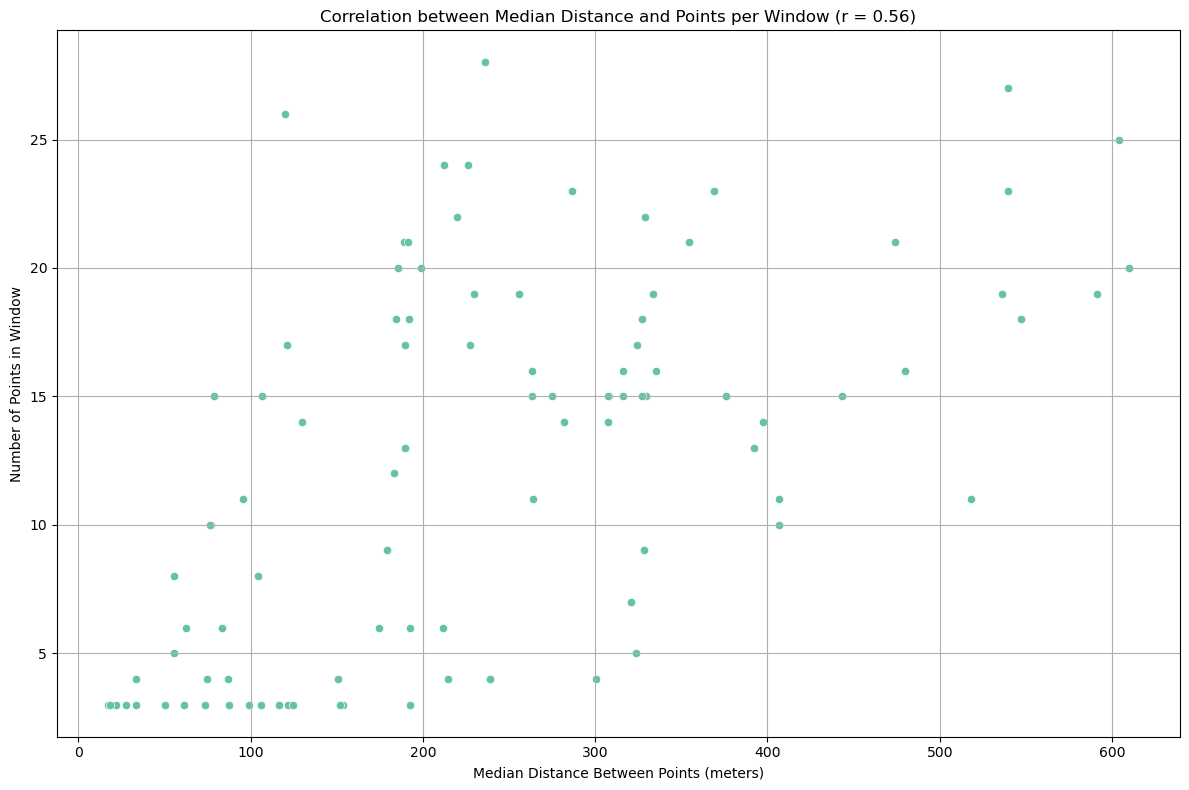

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the median distance between points for each window
median_distance_per_window = all_clusters.groupby('win_number')['max_dist_in_cluster'].median()

# Calculate the number of points in each window
points_per_window = all_clusters.groupby('win_number')['cluster_size'].sum()

# Restrict to the first 100 windows for plotting
points_per_window = points_per_window.head(100)
median_distance_per_window = median_distance_per_window.head(100)

# Combine the two series into a DataFrame for easy plotting
correlation_df = pd.DataFrame({
    'Median Distance': median_distance_per_window,
    'Points per Window': points_per_window
})

# Drop any rows with missing values
correlation_df = correlation_df.dropna()

# Create the correlation plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Median Distance', y='Points per Window', data=correlation_df)

# Calculate and display the correlation coefficient
correlation_coefficient = correlation_df['Median Distance'].corr(correlation_df['Points per Window'])
plt.title(f'Correlation between Median Distance and Points per Window (r = {correlation_coefficient:.2f})')
plt.xlabel('Median Distance Between Points (meters)')
plt.ylabel('Number of Points in Window')
plt.grid(True)
plt.tight_layout()
plt.show()


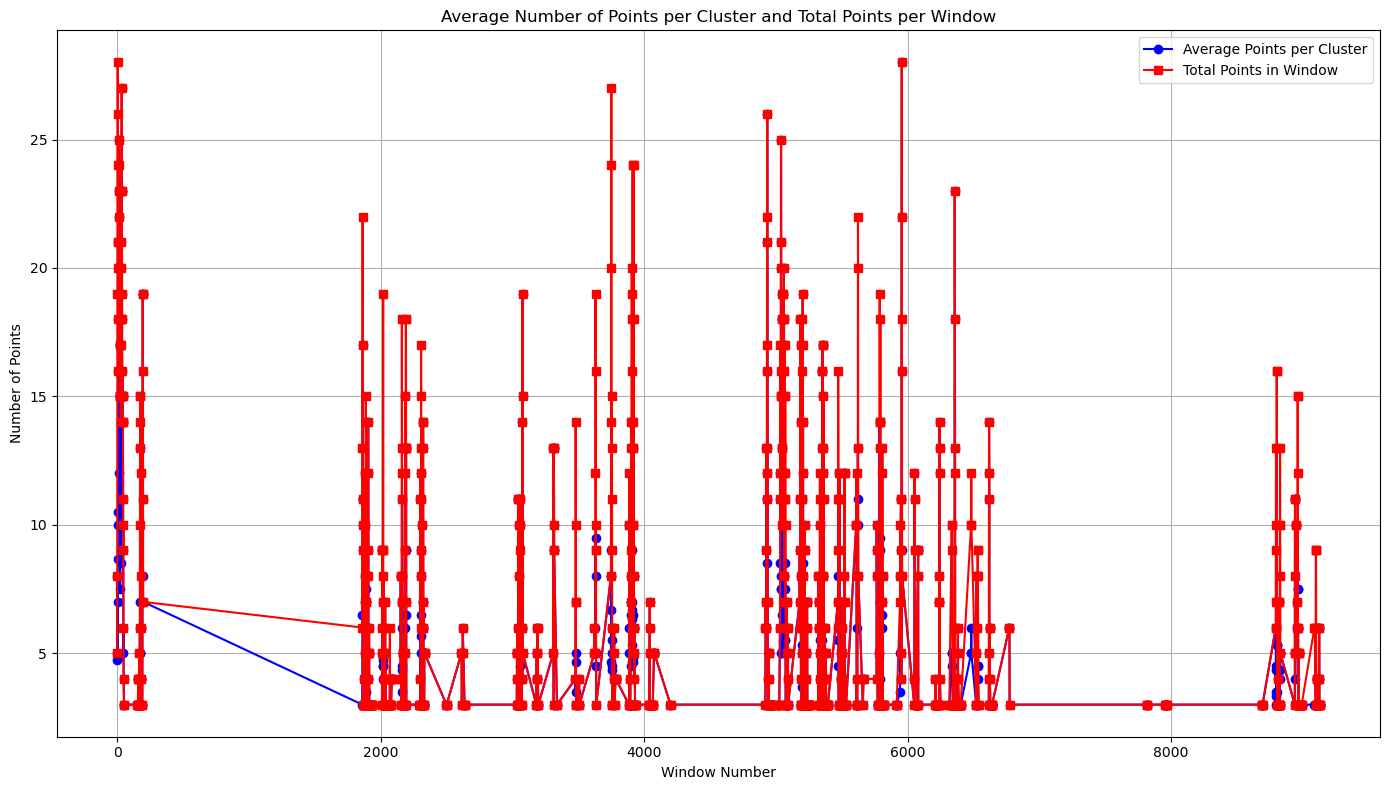

In [237]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'clusters_file1.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Calculate the number of points in each cluster
df['num_points_in_cluster'] = df['points'].apply(lambda x: len(eval(x)))

# Group by 'win_number' to calculate the average number of points in a cluster and the total number of points in a window
avg_points_per_cluster = df.groupby('win_number')['num_points_in_cluster'].mean()
total_points_in_window = df.groupby('win_number')['num_points_in_cluster'].sum()

# Create the plot
plt.figure(figsize=(14, 8))

# Plot the average number of points per cluster
plt.plot(avg_points_per_cluster.index, avg_points_per_cluster.values, marker='o', linestyle='-', color='b', label='Average Points per Cluster')

# Plot the total number of points in each window
plt.plot(total_points_in_window.index, total_points_in_window.values, marker='s', linestyle='-', color='r', label='Total Points in Window')

# Adding labels and title
plt.xlabel('Window Number')
plt.ylabel('Number of Points')
plt.title('Average Number of Points per Cluster and Total Points per Window')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


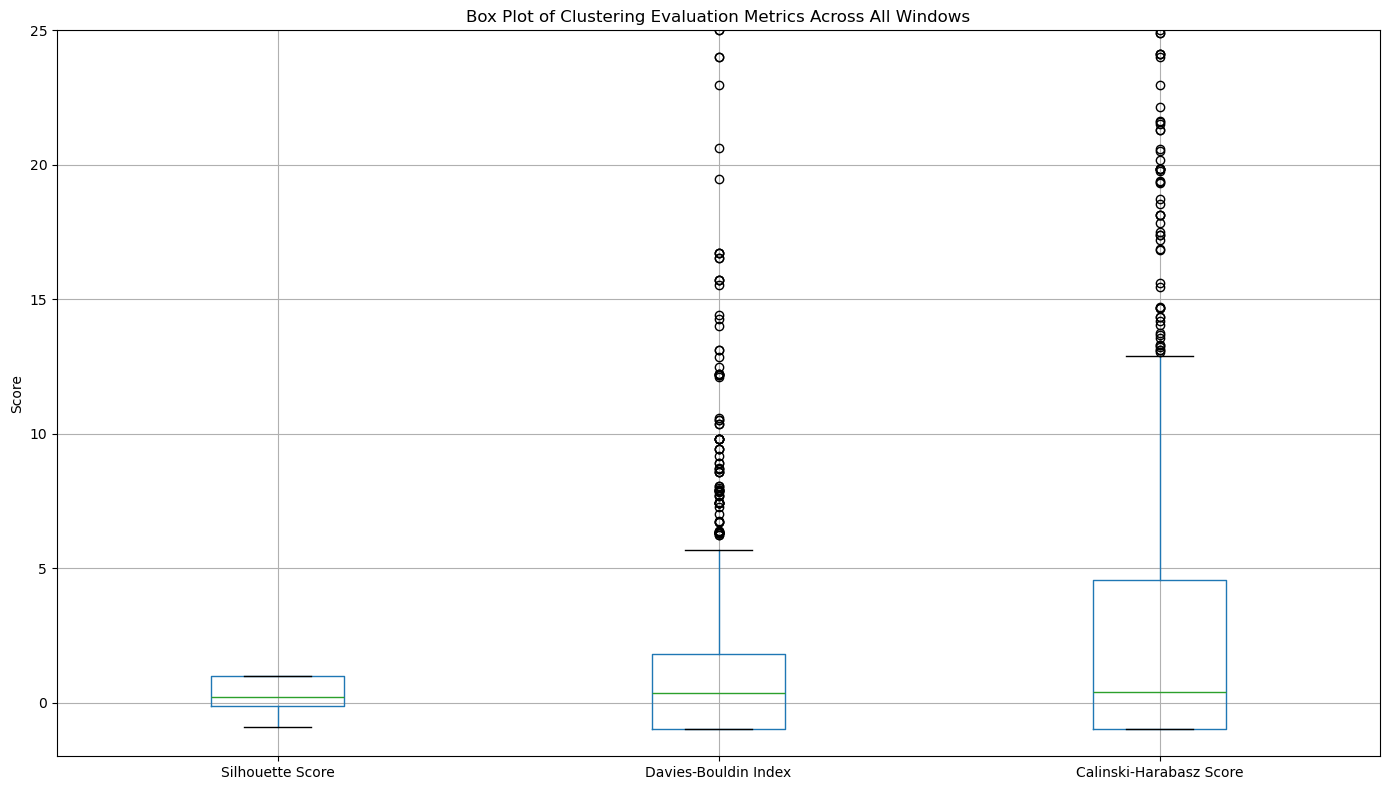

In [5]:
import matplotlib.pyplot as plt

# Combine all metrics into one DataFrame for easier plotting
combined_scores = pd.DataFrame({
    'Silhouette Score': all_clusters['silhouette_score']*-1,
    'Davies-Bouldin Index': all_clusters['davies_bouldin_score'],
    'Calinski-Harabasz Score': all_clusters['calinski_harabasz_score']
})

# Create the box plot
plt.figure(figsize=(14, 8))

# Plot the boxplot for all metrics
combined_scores.boxplot()

# Adding labels and title
plt.ylabel('Score')
plt.title('Box Plot of Clustering Evaluation Metrics Across All Windows')
plt.ylim(-2, 25)  # Set the y-axis limit to 1000
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


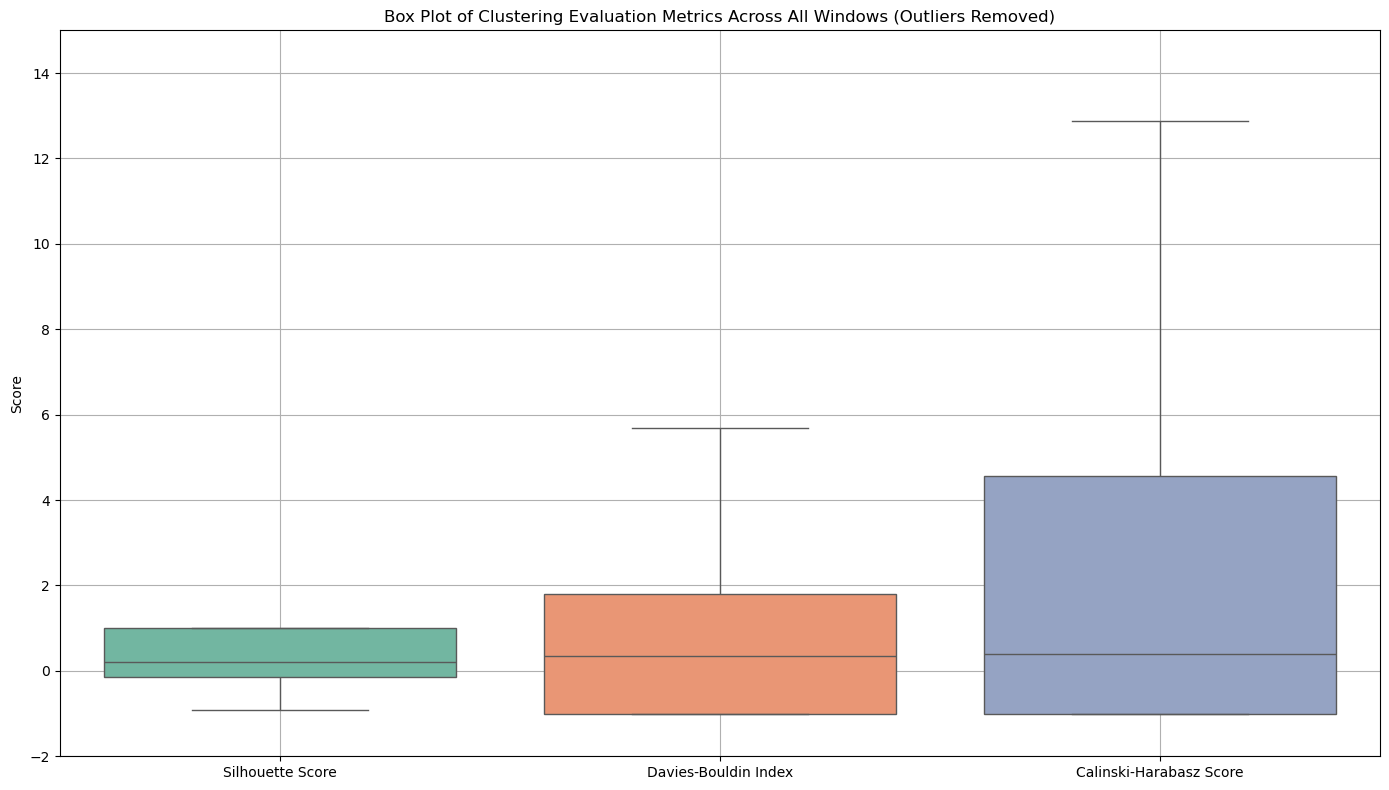

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all metrics into one DataFrame for easier plotting
combined_scores = pd.DataFrame({
    'Silhouette Score': all_clusters['silhouette_score']*-1,
    'Davies-Bouldin Index': all_clusters['davies_bouldin_score'],
    'Calinski-Harabasz Score': all_clusters['calinski_harabasz_score']
})

# Create the box plot with seaborn for better aesthetics
plt.figure(figsize=(14, 8))

# Plot the boxplot for all metrics, removing outliers and coloring each box
sns.boxplot(data=combined_scores, palette="Set2", showfliers=False)

# Adding labels and title
plt.ylabel('Score')
plt.title('Box Plot of Clustering Evaluation Metrics Across All Windows (Outliers Removed)')
plt.ylim(-2, 15)  # Set the y-axis limit to 1000
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


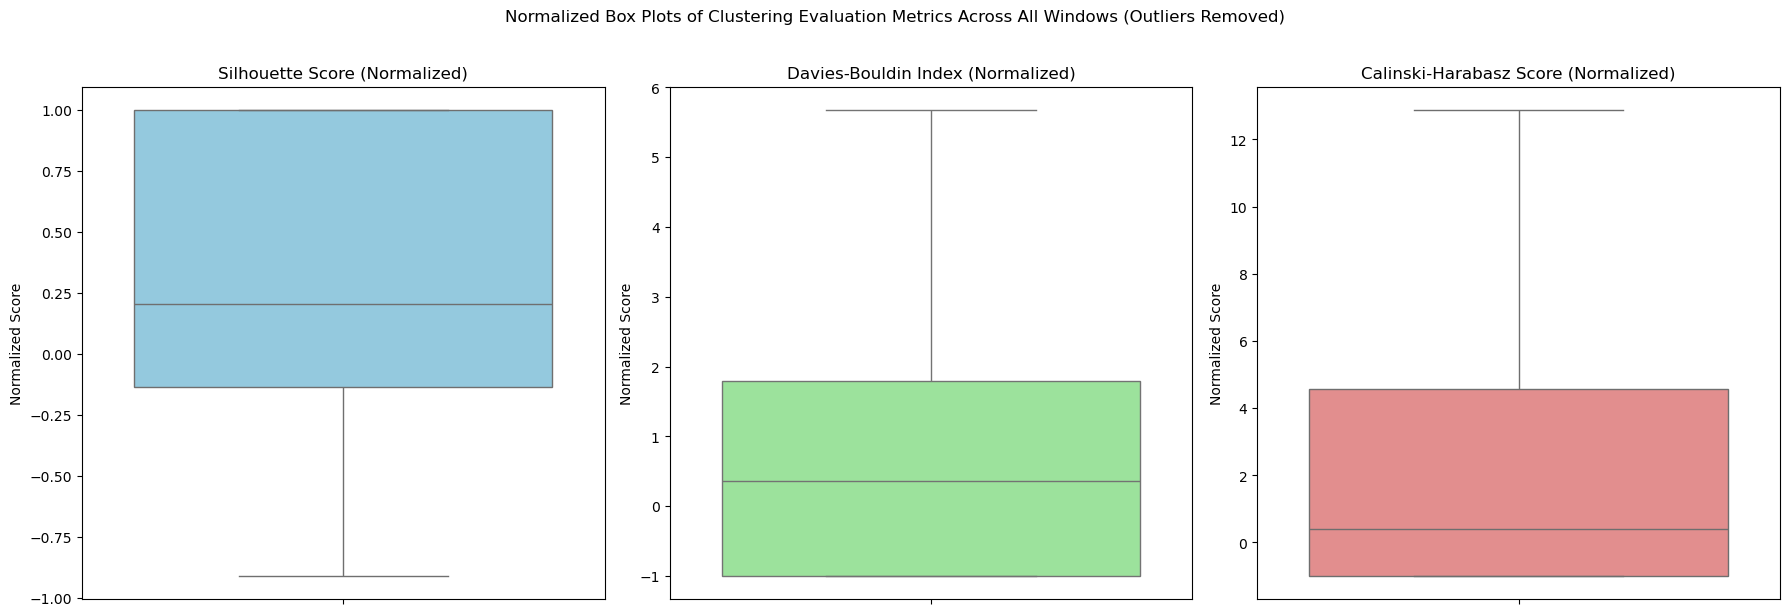

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Normalize all values between 0 and 1
normalized_scores = pd.DataFrame()
for column in ['silhouette_score', 'davies_bouldin_score', 'calinski_harabasz_score']:
    normalized_scores[column] = all_clusters[column] #(all_clusters[column] - all_clusters[column].min()) / (all_clusters[column].max() - all_clusters[column].min())

# Create subplots to place the boxplots in one line
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the Silhouette Score
sns.boxplot(data=normalized_scores['silhouette_score']*-1, ax=axes[0], color="skyblue", showfliers=False)
axes[0].set_title('Silhouette Score (Normalized)')
axes[0].set_ylabel('Normalized Score')

# Plot the Davies-Bouldin Index
sns.boxplot(data=normalized_scores['davies_bouldin_score'], ax=axes[1], color="lightgreen", showfliers=False)
axes[1].set_title('Davies-Bouldin Index (Normalized)')
axes[1].set_ylabel('Normalized Score')

# Plot the Calinski-Harabasz Score
sns.boxplot(data=normalized_scores['calinski_harabasz_score'], ax=axes[2], color="lightcoral", showfliers=False)
axes[2].set_title('Calinski-Harabasz Score (Normalized)')
axes[2].set_ylabel('Normalized Score')

# Add a main title and adjust layout
plt.suptitle('Normalized Box Plots of Clustering Evaluation Metrics Across All Windows (Outliers Removed)', y=1.02)
plt.tight_layout()

# Show the plot
plt.show()


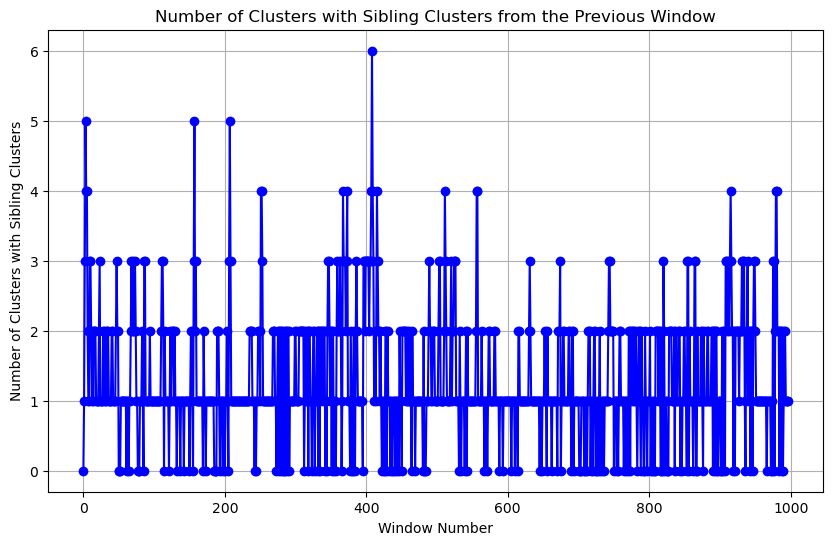

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure that all_clusters dataframe exists and contains 'win_number' and 'cluster_label'

# Initialize a list to store the count of clusters with sibling clusters for each window
sibling_clusters_per_window = []

# Loop through each window number
for win_number in sorted(all_clusters['win_number'].unique()):
    # Get clusters in the current window
    current_window_clusters = all_clusters[all_clusters['win_number'] == win_number]
    
    # If it's the first window, no previous window exists, so append 0 and continue
    if win_number == 0:
        sibling_clusters_per_window.append(0)
        continue
    
    # Get clusters in the previous window
    previous_window_clusters = all_clusters[all_clusters['win_number'] == win_number - 1]
    
    # Count clusters with siblings in the previous window
    sibling_count = 0
    for _, cluster in current_window_clusters.iterrows():
        points = set(tuple(x) for x in cluster['points'])
        for _, prev_cluster in previous_window_clusters.iterrows():
            prev_points = set(tuple(x) for x in prev_cluster['points'])
            if len(points.intersection(prev_points)) > 0:
                sibling_count += 1
                break  # Move to the next cluster once a sibling is found
    
    sibling_clusters_per_window.append(sibling_count)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(range(len(sibling_clusters_per_window)), sibling_clusters_per_window, marker='o', linestyle='-', color='blue')
plt.title('Number of Clusters with Sibling Clusters from the Previous Window')
plt.xlabel('Window Number')
plt.ylabel('Number of Clusters with Sibling Clusters')
plt.grid(True)
plt.show()


In [83]:
import pandas as pd

# Ensure that all_clusters dataframe exists and contains 'win_number' and 'cluster_label'

# Initialize variables to store the total number of clusters and the count of clusters with siblings
total_clusters = 0
total_sibling_clusters = 0

# Loop through each window number
for win_number in sorted(all_clusters['win_number'].unique()):
    # Get clusters in the current window
    current_window_clusters = all_clusters[all_clusters['win_number'] == win_number]
    
    # If it's the first window, no previous window exists, so skip to the next iteration
    if win_number == 0:
        continue
    
    # Get clusters in the previous window
    previous_window_clusters = all_clusters[all_clusters['win_number'] == win_number - 1]
    
    # Count clusters with siblings in the previous window
    for _, cluster in current_window_clusters.iterrows():
        points = set(tuple(x) for x in cluster['points'])
        for _, prev_cluster in previous_window_clusters.iterrows():
            prev_points = set(tuple(x) for x in prev_cluster['points'])
            if len(points.intersection(prev_points)) > 0:
                total_sibling_clusters += 1
                break  # Move to the next cluster once a sibling is found
    
    total_clusters += len(current_window_clusters)

# Calculate the overall percentage of clusters with siblings
percentage_siblings = (total_sibling_clusters / total_clusters) * 100

# Print the result
print(f"Overall Percentage of Clusters with Sibling Clusters: {percentage_siblings:.2f}%")


Overall Percentage of Clusters with Sibling Clusters: 77.11%


In [87]:
import pandas as pd

# Ensure that all_clusters dataframe exists and contains 'cluster_label'

# Initialize variables to store the total number of clusters and the count of noise clusters
total_clusters = 0
total_noise_clusters = 0

# Loop through each window number
for win_number in sorted(all_clusters['win_number'].unique()):
    # Get clusters in the current window
    current_window_clusters = all_clusters[all_clusters['win_number'] == win_number]
    
    # Count the number of noise clusters (label -1) in the current window
    noise_clusters = current_window_clusters[current_window_clusters['cluster_label'] == -1]
    
    # Add the count of noise clusters to the total
    total_noise_clusters += len(noise_clusters)
    
    # Add the total number of clusters in the current window to the overall total
    total_clusters += len(current_window_clusters)

# Print the total number of noise clusters
print(f"Total Number of Noise Clusters: {total_noise_clusters/total_clusters}")


Total Number of Noise Clusters: 0.2770795930580491


# Validating the clusterization model (per species)

check how many clusters in the dataframe match the kinematic features of the known species?

In [271]:
df["points"]

0      [[1682676414.0, -6.4702548, 37.4275712, 165.7]...
1      [[1682677615.0, -6.4777216, 37.4296832, 167.82...
2      [[1682678874.0, -6.4736764, 37.4344896, 227.43...
3      [[1682680014.0, -6.4803804, 37.4271776, 160.3]...
4      [[1682681333.0, -6.4794644, 37.4295008, 124.83...
                             ...                        
364    [[1688148865.0, -7.7356352, 41.437824, 1178.49...
365    [[1688150065.0, -7.741164, 41.448256, 1122.57]...
366    [[1688151287.0, -7.7388704, 41.4512992, 1138.0...
367    [[1688152464.0, -7.7362872, 41.4536224, 1152.1...
368    [[1688153663.0, -7.7357928, 41.4543872, 1179.4...
Name: points, Length: 369, dtype: object

In [273]:
import ast

# Function to count the number of points in the "points" list
def count_points(points_str):
    try:
        points_list = ast.literal_eval(points_str)  # Convert string representation of list to an actual list
        return len(points_list)
    except:
        return 0

# Apply the function to create a new column with the count of points
df['num_points'] = df['points'].apply(count_points)

# Filter and display the rows where the number of points is less than 4
filtered_df = df[df['num_points'] < 4]
print(filtered_df[['points']])

                                                points
26   [[1682707625.0, -6.4745636, 37.4168512, 142.85...
28   [[1682710610.0, -6.4784904, 37.4252768, 99.69]...
34   [[1683834219.0, -6.312672, 37.0274432, -94.55]...
44   [[1683917021.0, -6.3048272, 37.0491712, 41.25]...
46   [[1683920139.0, -6.3056148, 37.0459264, 56.4],...
..                                                 ...
355  [[1688136081.0, -7.1336424, 41.2134528, 735.73...
356  [[1688136511.0, -7.1391176, 41.2341088, 527.54...
357  [[1688136511.0, -7.1391176, 41.2341088, 527.54...
358  [[1688136511.0, -7.1391176, 41.2341088, 527.54...
359  [[1688138540.0, -7.2706048, 41.2734656, 875.3]...

[61 rows x 1 columns]


In [217]:
import pandas as pd
import numpy as np
from scipy.stats import kendalltau
from math import atan2, radians, degrees, sqrt, sin, cos

# Load the dataset
file_path = 'clusters_file1.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Function to convert epoch time in milliseconds to datetime
def convert_epoch_to_datetime(epoch_ms):
    return pd.to_datetime(epoch_ms*1000, unit='ms')

# Function to calculate haversine distance
def haversine(point1, point2):
    lon1, lat1, alt1 = point1
    lon2, lat2, alt2 = point2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    r = 6371000  # Radius of earth in meters
    distance = r * c
    
    # Include altitude difference
    alt_diff = abs(alt2 - alt1)
    total_distance = sqrt(distance ** 2 + alt_diff ** 2)
    return total_distance

# Function to calculate bearing
def calculate_bearing(point1, point2):
    lon1, lat1, alt1 = point1
    lon2, lat2, alt2 = point2
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    x = sin(dlon) * cos(lat2)
    y = cos(lat1) * sin(lat2) - sin(lat1) * cos(lat2) * cos(dlon)
    initial_bearing = atan2(x, y)
    initial_bearing = degrees(initial_bearing)
    compass_bearing = (initial_bearing + 360) % 360
    return compass_bearing

# Function to calculate angle to horizon
def calculate_angle_to_horizon(alt1, alt2, horizontal_distance):
    vertical_distance = alt2 - alt1
    return degrees(atan2(vertical_distance, horizontal_distance))

# Function to calculate kinematic features
def calculate_kinematic_features(cluster_points):
    timestamps = [p[0] for p in cluster_points]
    lons = [p[1] for p in cluster_points]
    lats = [p[2] for p in cluster_points]
    alts = [p[3] for p in cluster_points]
    
    # Normalize timestamps to start from t=0
    t0 = timestamps[0]
    normalized_timestamps = [(t - t0) / 1000 for t in timestamps]  # Convert to seconds

    # Ensure there are enough points to calculate kinematic features
    if len(normalized_timestamps) < 2:
        return None  # Not enough points to calculate features
    
    # Calculate differences between consecutive points
    time_diffs = np.diff(normalized_timestamps).astype(np.float64)  # in seconds
    time_diffs[time_diffs == 0] = np.nan  # Avoid division by zero by setting to NaN
    
    if len(time_diffs) == 0:
        return None
    
    distances = [haversine(cluster_points[i][1:], cluster_points[i+1][1:]) for i in range(len(cluster_points)-1)]
    distances = np.array(distances)
    
    if len(distances) == 0:
        return None
    
    speeds = distances / time_diffs  # Speed = distance / time
    speeds = np.where(np.isfinite(speeds), speeds, np.nan)  # Replace inf with NaN
    
    # Velocity calculation (as vector)
    velocities = [(speeds[i], calculate_bearing(cluster_points[i][1:], cluster_points[i+1][1:])) for i in range(len(speeds))]
    
    accelerations = np.diff(speeds) / time_diffs[:-1]  # Acceleration = change in speed / time
    accelerations = np.where(np.isfinite(accelerations), accelerations, np.nan)
    
    jerks = np.diff(accelerations) / time_diffs[:-2]  # Jerk = change in acceleration / time
    jerks = np.where(np.isfinite(jerks), jerks, np.nan)
    
    # Bearing calculations
    bearings = [calculate_bearing(cluster_points[i][1:], cluster_points[i+1][1:]) for i in range(len(cluster_points)-1)]
    bearing_changes = np.diff(bearings)
    
    # Angle to horizon
    angles_to_horizon = [calculate_angle_to_horizon(alts[i], alts[i+1], distances[i]) for i in range(len(alts)-1)]
    
    # Calculate the average height
    avg_height = np.mean(alts)
    
    # Turn rate, trajectory curvature, angular velocity, etc.
    turn_rate = np.nanmean(np.abs(bearing_changes) / time_diffs[:-1])
    curvature = np.nanmean(bearing_changes / distances[:-1])
    angular_velocity = np.nanmean(bearing_changes / time_diffs[:-1])
    angular_acceleration = np.nanmean(np.diff(bearing_changes) / time_diffs[:-2])
    
    # Displacement calculations
    displacement = haversine(cluster_points[0][1:], cluster_points[-1][1:])
    distance_traveled = np.sum(distances)
    
    # Vertical acceleration
    vertical_acceleration = np.diff(alts) / time_diffs
    vertical_acceleration = np.where(np.isfinite(vertical_acceleration), vertical_acceleration, np.nan)
    
    # Up/Down direction using Kendall Tau
    tau, _ = kendalltau(alts, np.arange(len(alts)))
    
    return {
        'avg_height': avg_height,
        'turn_rate': turn_rate,
        'bearing': np.nanmean(bearings),
        'trajectory_curvature': curvature,
        'angular_acceleration': angular_acceleration,
        'angular_velocity': angular_velocity,
        'distance_traveled': distance_traveled,
        'displacement': displacement,
        'jerk': np.nanmean(jerks),
        'vertical_acceleration': np.nanmean(vertical_acceleration),
        'up_down_direction': tau,
        'angle_to_horizon': np.nanmean(angles_to_horizon),
        'average_speed': np.nanmean(speeds),
        'average_velocity_magnitude': np.nanmean([v[0] for v in velocities]),
        'average_velocity_direction': np.nanmean([v[1] for v in velocities])
    }

# Keep only clusters with at least 30 points
df['points'] = df['points'].apply(eval)  # Convert the 'points' column from string to list
df_filtered = df[df['points'].apply(len) >= 10].reset_index(drop=True)

# Reindex the filtered DataFrame and use the new index as cluster labels
df_filtered['new_cluster_label'] = df_filtered.index

# Process clusters
clusters_with_features = []

for new_cluster_label, cluster in df_filtered.groupby('new_cluster_label'):
    #print("Processing cluster:", new_cluster_label)
    cluster_points = cluster.iloc[0]['points']  # Get the points for this cluster
    features = calculate_kinematic_features(cluster_points)
    if features:  # Only append if features were successfully calculated
        features['new_cluster_label'] = new_cluster_label
        clusters_with_features.append(features)

# Convert to DataFrame
clusters_with_features_df = pd.DataFrame(clusters_with_features)

# Merge the features back with the original dataframe (optional)
df = df_filtered.merge(clusters_with_features_df, on='new_cluster_label', how='left')

# Save or inspect the updated DataFrame
df.to_csv('clusters1_with_kinematic_features.csv', index=False)


Processing cluster: 0
Processing cluster: 1
Processing cluster: 2
Processing cluster: 3
Processing cluster: 4
Processing cluster: 5
Processing cluster: 6
Processing cluster: 7
Processing cluster: 8
Processing cluster: 9
Processing cluster: 10
Processing cluster: 11
Processing cluster: 12
Processing cluster: 13
Processing cluster: 14
Processing cluster: 15
Processing cluster: 16
Processing cluster: 17
Processing cluster: 18
Processing cluster: 19
Processing cluster: 20
Processing cluster: 21
Processing cluster: 22
Processing cluster: 23
Processing cluster: 24
Processing cluster: 25
Processing cluster: 26
Processing cluster: 27
Processing cluster: 28
Processing cluster: 29
Processing cluster: 30
Processing cluster: 31
Processing cluster: 32
Processing cluster: 33
Processing cluster: 34
Processing cluster: 35
Processing cluster: 36
Processing cluster: 37
Processing cluster: 38
Processing cluster: 39
Processing cluster: 40
Processing cluster: 41
Processing cluster: 42
Processing cluster: 4

In [9]:
df

Unnamed: 0  cluster_label  silhouette_score  davies_bouldin_score  \
0            0            0.0         -0.147709              0.744816   
1            1            0.0         -0.166102              0.775431   
2            2            0.0          0.641063              1.751349   
3            3            0.0          0.227657              0.508506   
4            4            0.0          0.307980              0.464924   
5            5            0.0          0.402332              0.403338   
6            6            0.0         -0.079800              0.699759   
7            7            0.0         -0.246292              0.965592   
8            8            0.0         -0.459594              2.143278   
9            9            0.0         -0.204188              1.471977   
10          10            0.0         -0.110871              1.160924   
11          11            0.0          0.078729              0.602808   
12          12            0.0          0.311433              0.394830   
13          13            0.0         -0.033809              0.644286   
14          14            0.0         -0.008265              0.667443   
15          15            0.0         -0.118954              0.857478   
16          16            0.0         -0.102229              0.786479   
17          17            0.0         -0.167101              0.875261   
18          18            0.0         -0.169081              0.810641   
19          19            0.0         -0.336645              1.339566   
20          20            0.0         -0.456634              1.495250   
21          21            0.0         -0.418187              1.246462   
22          22            0.0         -0.432896              1.268732   
23          30            0.0          0.465269              0.412572   
24          50            0.0          0.875605              0.061436   
25          51            0.0          0.937379              0.017509   
26          52            0.0          0.937756              0.017048   
27          77            0.0          0.458011              0.293226   
28          78            0.0          0.651790              0.185983   
29          93            0.0         -0.177530             17.701380   
30         100            0.0          0.638143              1.239135   
31         101            0.0          0.674559              1.757240   
32         113            0.0         -0.344583              1.420263   
33         114            0.0         -0.230468              1.110559   
34         116            0.0         -0.075054              0.756193   
35         131            0.0          0.646074              0.279450   
36         132            0.0          0.573466              0.237494   
37         133            0.0          0.607905              0.226032   
38         134            0.0          0.671364              0.198777   
39         135            0.0         -0.294407              1.252015   
40         160            0.0         -0.174203              0.779528   
41         161            0.0         -0.283887              0.885412   
42         162            0.0          0.203976              0.481254   
43         198            0.0          0.826219              0.086889   
44         199            0.0          0.389712              0.653699   
45         200            0.0          0.026121              0.675955   
46         201            0.0         -0.049564              0.705364   
47         207            0.0          0.474600              0.366843   
48         233            0.0          0.541375              0.262406   
49         245            0.0          0.393160              0.396457   
50         246            0.0          0.444591              0.391289   
51         247            0.0          0.423177              0.407950   
52         338            0.0          0.144880              1.202262   

    calinski_harabasz_score  win_eps  min_dist_between_points

# Comparing Extracted Kinematic Features 
(for each cluster in dataset file)

In [219]:
common_kestrel_ranges = {
    'avg_height': (100, 500),  # in meters
    'turn_rate': (0.01, 0.2),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.001, 0.05),  # in radians per meter
    'angular_acceleration': (-0.01, 0.01),  # in radians per second^2
    'angular_velocity': (-0.1, 0.1),  # in radians per second
    'distance_traveled': (1000, 10000),  # in meters
    'displacement': (500, 5000),  # in meters
    'jerk': (-0.001, 0.001),  # in meters per second^3
    'vertical_acceleration': (-0.5, 0.5),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-10, 10),  # in degrees
    'average_speed': (5, 25),  # in meters per second
    'average_velocity_magnitude': (5, 25),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [13]:
herring_gull_ranges = {
    'avg_height': (50, 300),  # in meters
    'turn_rate': (0.01, 0.15),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.002, 0.04),  # in radians per meter
    'angular_acceleration': (-0.02, 0.02),  # in radians per second^2
    'angular_velocity': (-0.15, 0.15),  # in radians per second
    'distance_traveled': (800, 8000),  # in meters
    'displacement': (400, 4000),  # in meters
    'jerk': (-0.002, 0.002),  # in meters per second^3
    'vertical_acceleration': (-0.4, 0.4),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-15, 15),  # in degrees
    'average_speed': (4, 20),  # in meters per second
    'average_velocity_magnitude': (4, 20),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [15]:
white_stork_ranges = {
    'avg_height': (100, 1000),  # in meters
    'turn_rate': (0.01, 0.12),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.001, 0.03),  # in radians per meter
    'angular_acceleration': (-0.01, 0.01),  # in radians per second^2
    'angular_velocity': (-0.12, 0.12),  # in radians per second
    'distance_traveled': (1500, 15000),  # in meters
    'displacement': (750, 7500),  # in meters
    'jerk': (-0.0015, 0.0015),  # in meters per second^3
    'vertical_acceleration': (-0.3, 0.3),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-12, 12),  # in degrees
    'average_speed': (6, 30),  # in meters per second
    'average_velocity_magnitude': (6, 30),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [17]:
homing_pigeon_ranges = {
    'avg_height': (50, 200),  # in meters
    'turn_rate': (0.02, 0.3),  # in radians per second
    'bearing': (0, 360),  # in degrees
    'trajectory_curvature': (0.003, 0.06),  # in radians per meter
    'angular_acceleration': (-0.015, 0.015),  # in radians per second^2
    'angular_velocity': (-0.2, 0.2),  # in radians per second
    'distance_traveled': (500, 5000),  # in meters
    'displacement': (250, 2500),  # in meters
    'jerk': (-0.002, 0.002),  # in meters per second^3
    'vertical_acceleration': (-0.3, 0.3),  # in meters per second^2
    'up_down_direction': (-1, 1),  # Kendall's Tau coefficient
    'angle_to_horizon': (-10, 10),  # in degrees
    'average_speed': (8, 18),  # in meters per second
    'average_velocity_magnitude': (8, 18),  # in meters per second
    'average_velocity_direction': (0, 360)  # in degrees
}

In [223]:
import pandas as pd
import numpy as np

# Assuming clusters_with_kinematic_features_df is your DataFrame from previous code

# Define the ranges for Common Kestrel

# Function to check if cluster values fall within the species ranges
def is_within_ranges(cluster, species_ranges):
    for feature, (min_val, max_val) in species_ranges.items():
        if feature in cluster:  # Ensure the feature exists in the cluster
            if not (min_val <= cluster[feature] <= max_val):
                print(f"{feature} out of range: {cluster[feature]} not in ({min_val}, {max_val})")
                return False
        else:
            print(f"Feature {feature} not found in the cluster")
            return False
    return True

# Apply the check to each cluster
clusters_with_features_df['matches_common_kestrel'] = clusters_with_features_df.apply(
    lambda row: is_within_ranges(row, common_kestrel_ranges), axis=1
)

# Save or inspect the updated DataFrame
clusters_with_features_df.to_csv('clusters_with_kinematic_features_and_species_check.csv', index=False)

# Print the result of clusters that match the Common Kestrel ranges
print(clusters_with_features_df[clusters_with_features_df['matches_common_kestrel']])


turn_rate out of range: 1897.1872727233122 not in (0.01, 0.2)
turn_rate out of range: 1604.0626487430452 not in (0.01, 0.2)
turn_rate out of range: 1343.0995221359137 not in (0.01, 0.2)
turn_rate out of range: 1213.631676818895 not in (0.01, 0.2)
turn_rate out of range: 1567.4499002640766 not in (0.01, 0.2)
turn_rate out of range: 1663.2146836168642 not in (0.01, 0.2)
turn_rate out of range: 1681.5672819875595 not in (0.01, 0.2)
turn_rate out of range: 1941.3702865092987 not in (0.01, 0.2)
turn_rate out of range: 1960.3381008599508 not in (0.01, 0.2)
turn_rate out of range: 1567.7000555856664 not in (0.01, 0.2)
turn_rate out of range: 1453.1950764035842 not in (0.01, 0.2)
turn_rate out of range: 1376.8555736173387 not in (0.01, 0.2)
turn_rate out of range: 1202.636942040706 not in (0.01, 0.2)
turn_rate out of range: 1560.4475690738714 not in (0.01, 0.2)
turn_rate out of range: 1750.3764733439734 not in (0.01, 0.2)
turn_rate out of range: 1547.3982465298234 not in (0.01, 0.2)
turn_rate 

In [21]:
clusters_with_features_df[clusters_with_features_df['matches_common_kestrel']]

Empty DataFrame
Columns: [avg_height, turn_rate, bearing, trajectory_curvature, angular_acceleration, angular_velocity, distance_traveled, displacement, jerk, vertical_acceleration, up_down_direction, angle_to_horizon, average_speed, average_velocity_magnitude, average_velocity_direction, new_cluster_label, matches_common_kestrel]
Index: []

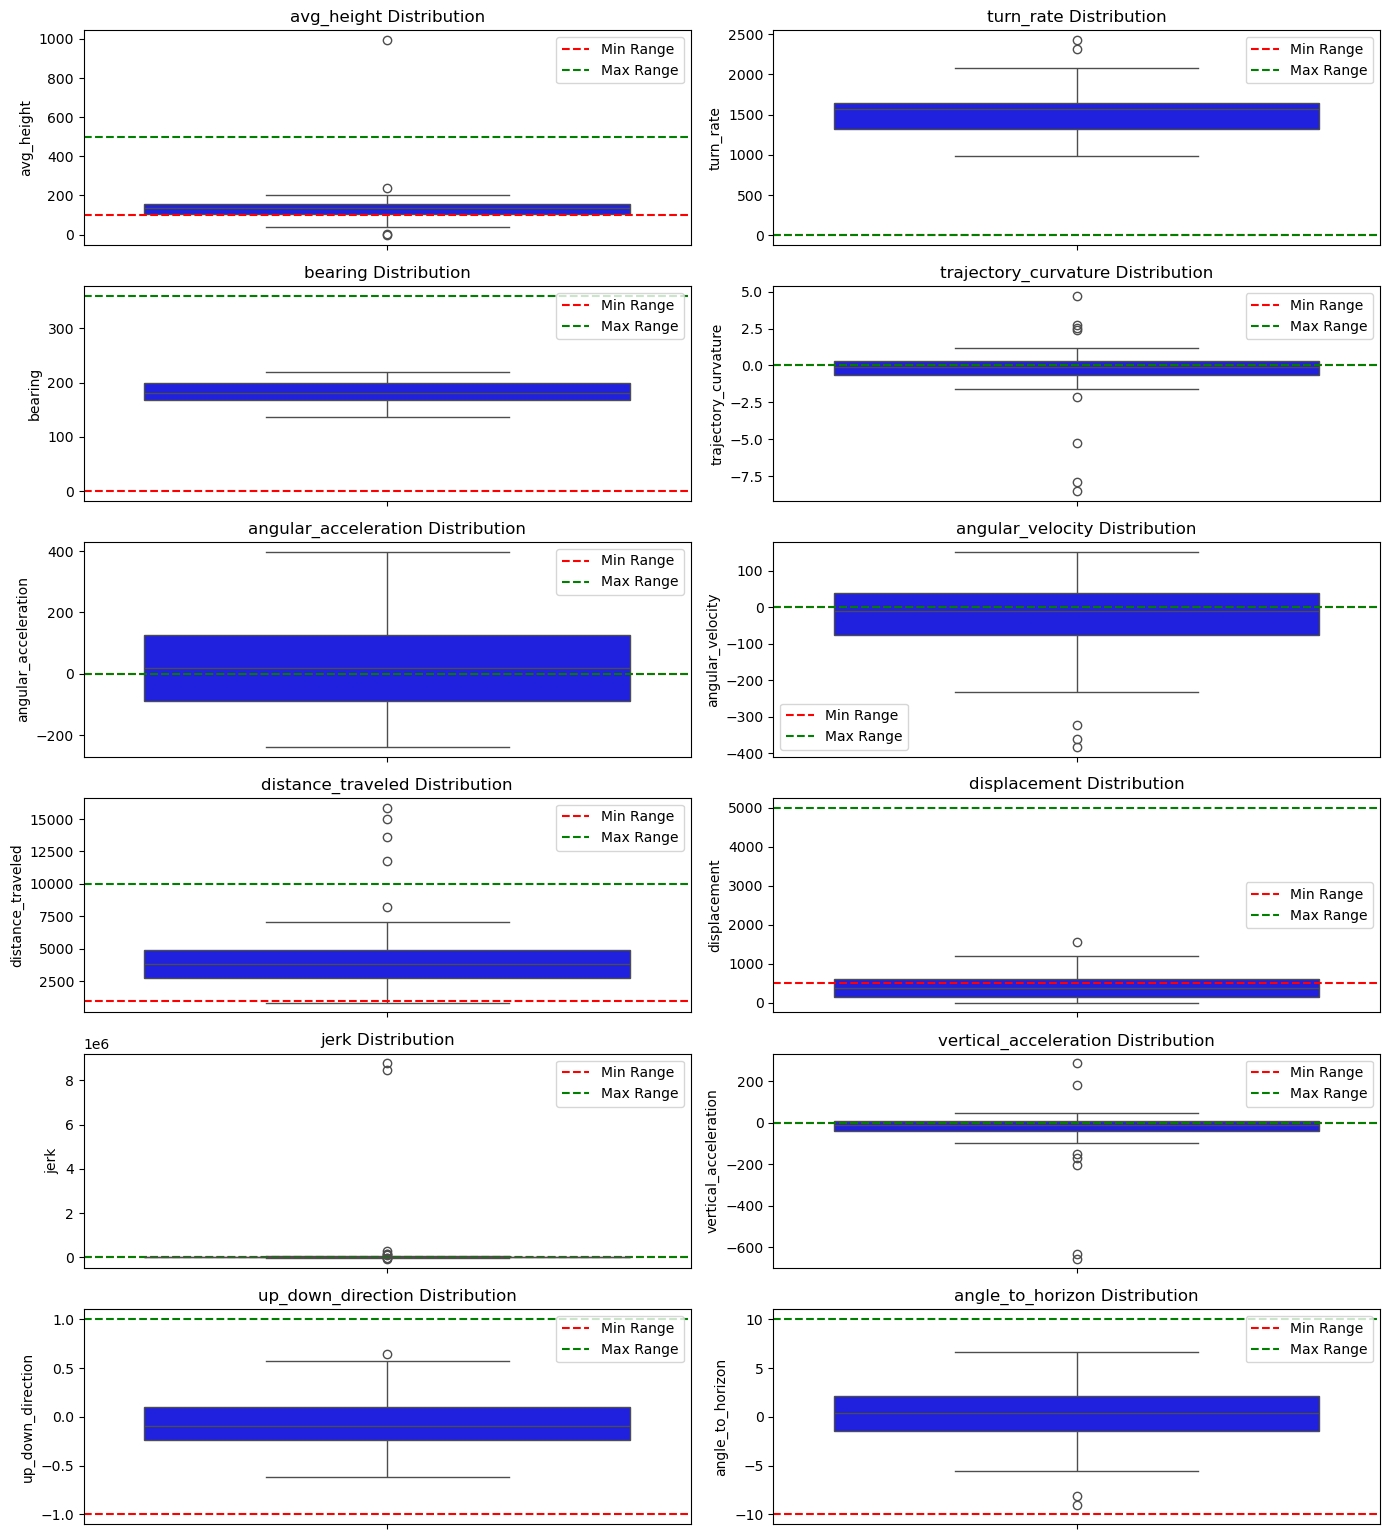

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a subset of features to plot (e.g., first 12)
selected_features = list(common_kestrel_ranges.items())[:12]

# Plot box plots for each feature against the range
fig = plt.figure(figsize=(14, 18))

# Keep the grid size at 7 rows by 2 columns
for i, (feature, (min_val, max_val)) in enumerate(selected_features):
    plt.subplot(7, 2, i+1)  # Adjust the layout accordingly
    sns.boxplot(data=clusters_with_features_df,color='blue', y=feature)
    plt.axhline(y=min_val, color='red', linestyle='--', label='Min Range')
    plt.axhline(y=max_val, color='green', linestyle='--', label='Max Range')
    plt.title(f'{feature} Distribution')
    plt.legend()

plt.tight_layout()
plt.show()


In [39]:
fig.savefig('kinematics1_boxplot.png', dpi=300, bbox_inches='tight')

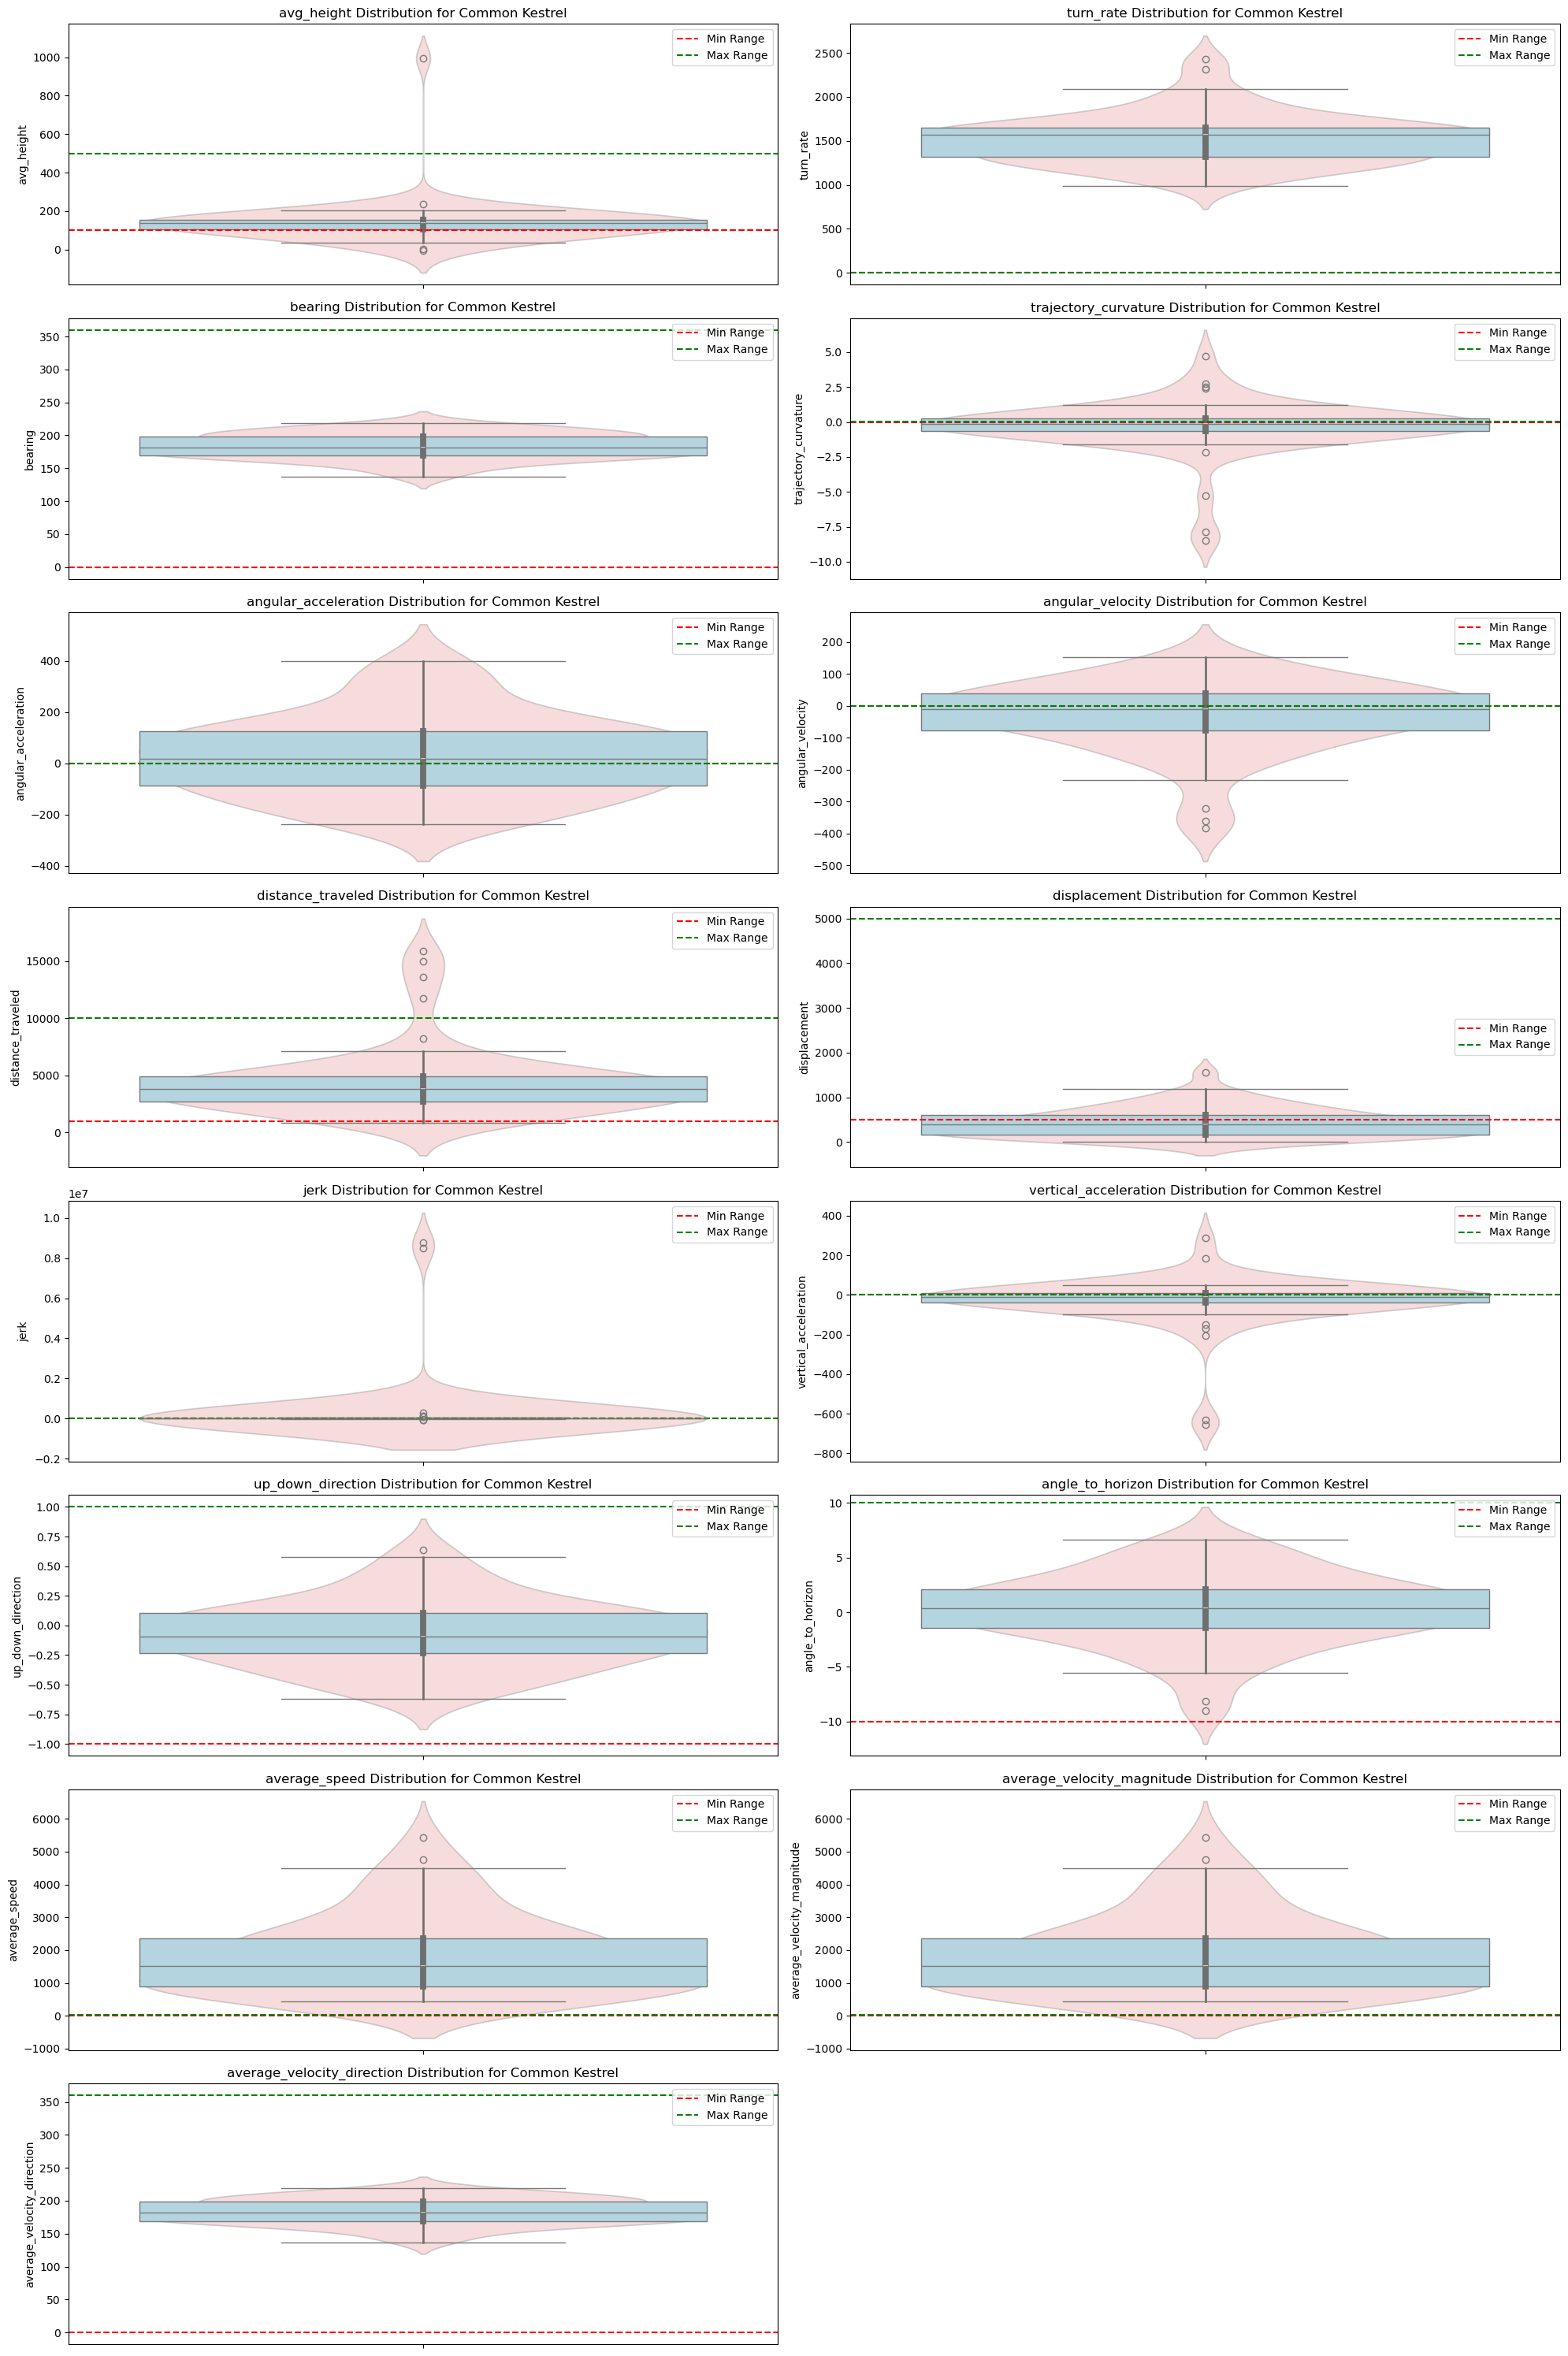

In [40]:

# Initialize the plot
fig = plt.figure(figsize=(20, 30))

# Plot box plots and violin plots for each feature
for i, (feature, (min_val, max_val)) in enumerate(common_kestrel_ranges.items()):
    plt.subplot(8, 2, i+1)
    
    # Box plot
    sns.boxplot(data=clusters_with_features_df, y=feature, color='lightblue')
    
    # Violin plot (overlayed for better visualization)
    sns.violinplot(data=clusters_with_features_df, y=feature, color='lightcoral', alpha=0.3)
    
    # Add lines for min and max range
    plt.axhline(y=min_val, color='red', linestyle='--', label='Min Range')
    plt.axhline(y=max_val, color='green', linestyle='--', label='Max Range')
    
    # Title and labels
    plt.title(f'{feature} Distribution for Common Kestrel')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [42]:
fig.savefig('kinematics1_violins.png', dpi=300, bbox_inches='tight')

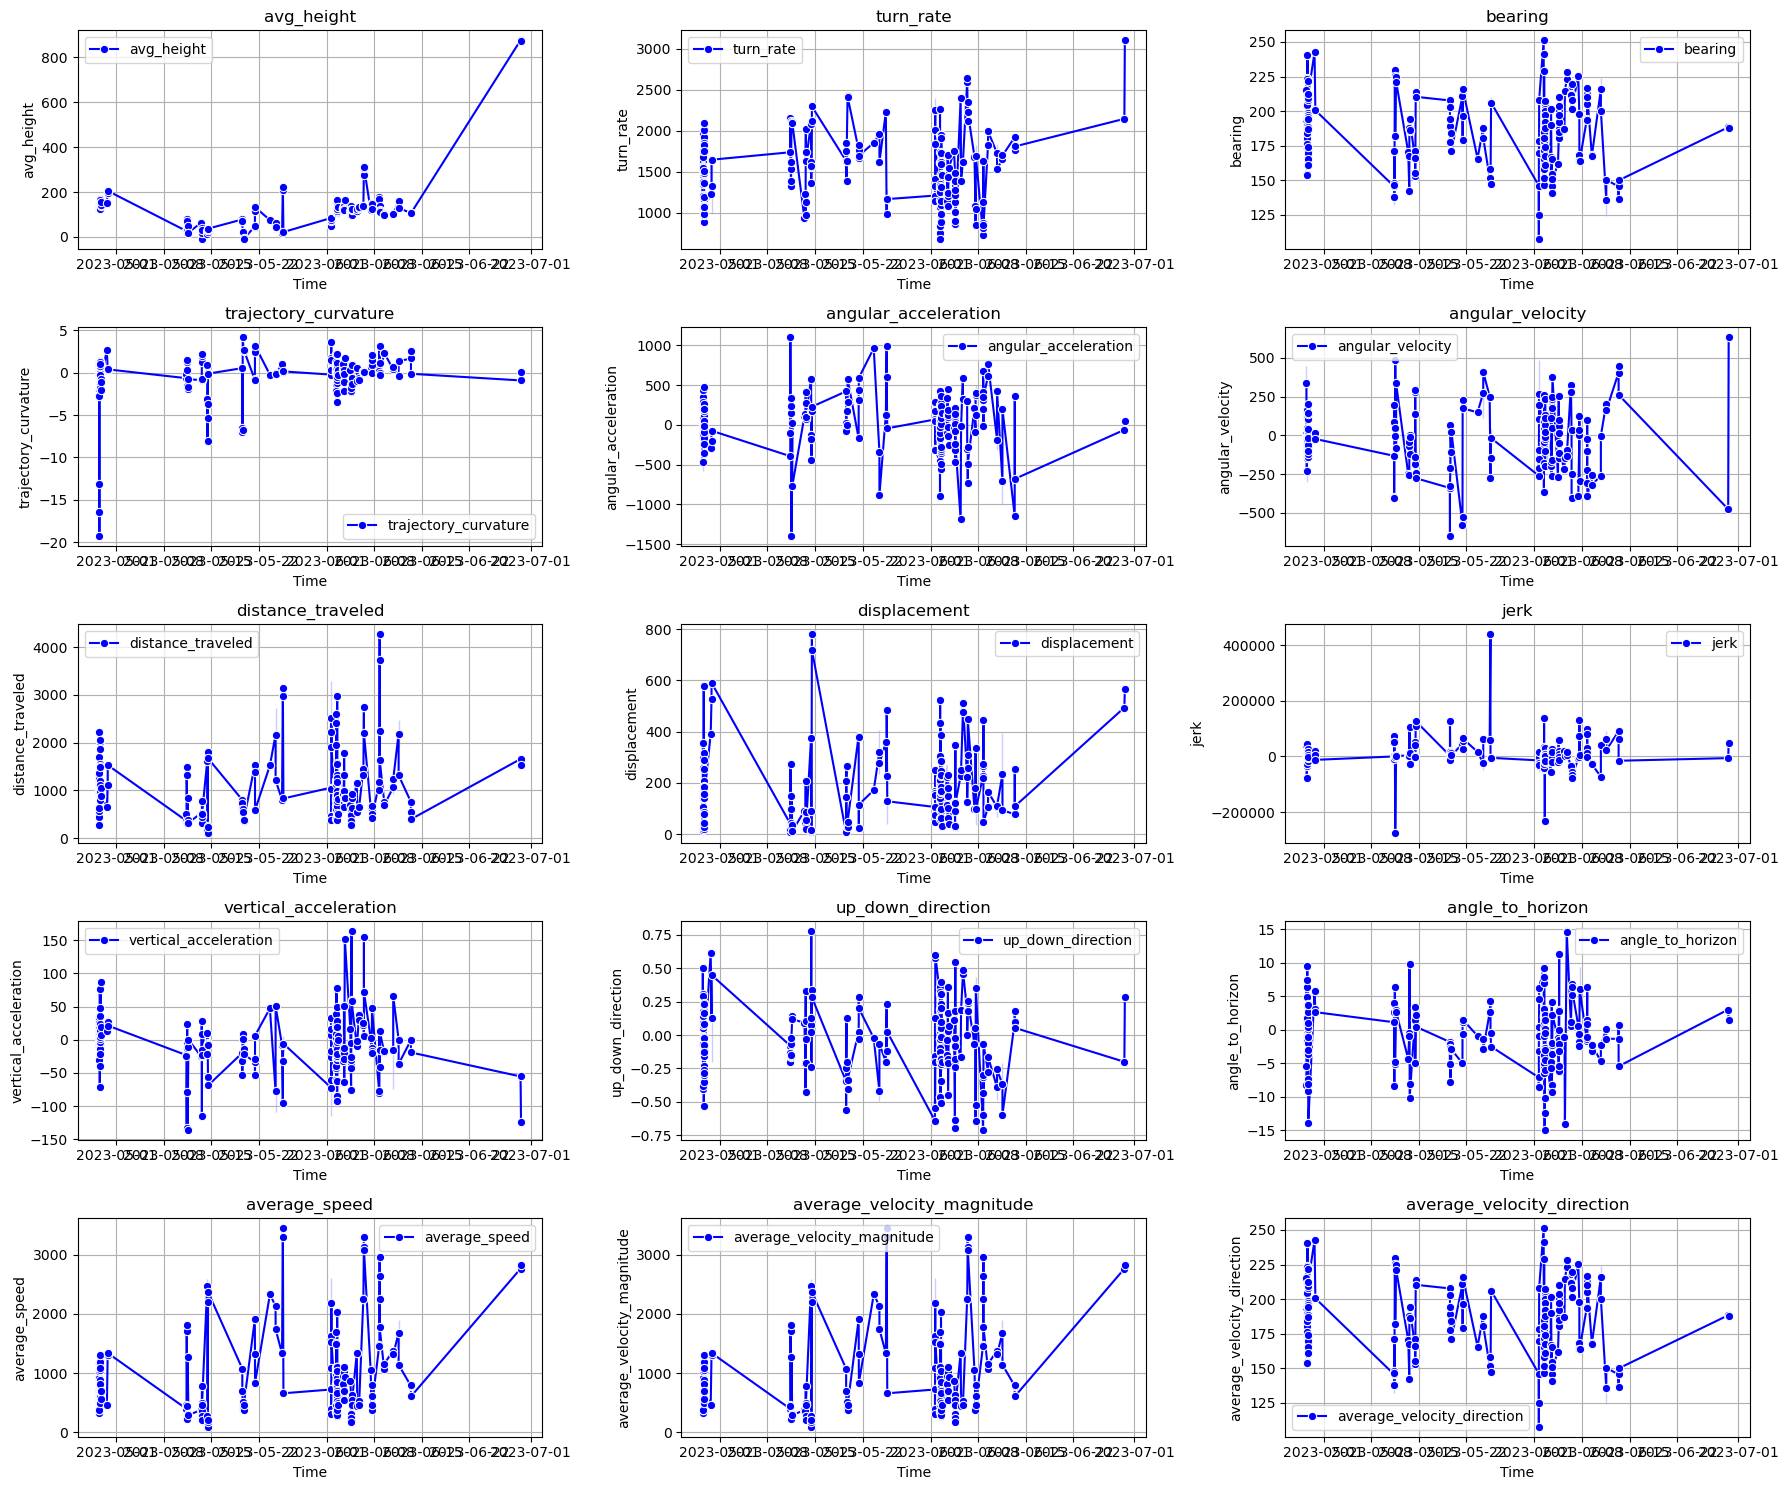

In [247]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'clusters1_with_kinematic_features.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Ensure that the timestamp is in datetime format
df['timestamp'] = pd.to_datetime(df['first_timestamp'], format='%Y-%m-%d %H:%M:%S')

# Define the kinematic parameters you want to visualize
kinematic_parameters = [
    'avg_height', 'turn_rate', 'bearing', 'trajectory_curvature',
    'angular_acceleration', 'angular_velocity', 'distance_traveled',
    'displacement', 'jerk', 'vertical_acceleration', 'up_down_direction',
    'angle_to_horizon', 'average_speed', 'average_velocity_magnitude',
    'average_velocity_direction'
]

# Create subplots with a specific layout for compactness
num_params = len(kinematic_parameters)
cols = 3  # Number of columns in the subplot grid
rows = (num_params + cols - 1) // cols  # Number of rows needed

fig = plt.figure(figsize=(18, 15))
sns.set_palette("Set2")

for i, param in enumerate(kinematic_parameters):
    plt.subplot(rows, cols, i + 1)
    sns.lineplot(x=df['timestamp'], y=df[param],color='blue', label=param, marker="o")
    
    # Adding labels and title for each parameter
    plt.xlabel('Time')
    plt.ylabel(param)
    plt.title(f'{param}')
    plt.grid(True)

# Adjust layout to avoid overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


In [44]:
fig.savefig('kinematics1_lines.png', dpi=300, bbox_inches='tight')

# Poisson Regression Model

Estimate objects count in clusters using PR model

In [249]:
import pandas as pd
import statsmodels.api as sm

clusters_with_features_df = pd.read_csv('clusters1_with_kinematic_features.csv')

# Assuming clusters_with_features_df contains your data
# The number of points in each cluster is the response variable
clusters_with_features_df['number_of_points'] = clusters_with_features_df['points'].apply(len)

# Define the response variable (number of points)
y = clusters_with_features_df['number_of_points']

# Define the explanatory variables (e.g., average speed, distance traveled)
# You can select the features you want to include in the model
X = clusters_with_features_df[['average_speed', 'distance_traveled', 'avg_height']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Print the summary of the model
print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:       number_of_points   No. Observations:                  187
Model:                            GLM   Df Residuals:                      183
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2373.4
Date:                Fri, 23 Aug 2024   Deviance:                       3189.7
Time:                        17:26:49   Pearson chi2:                 3.26e+03
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.3443      0.00

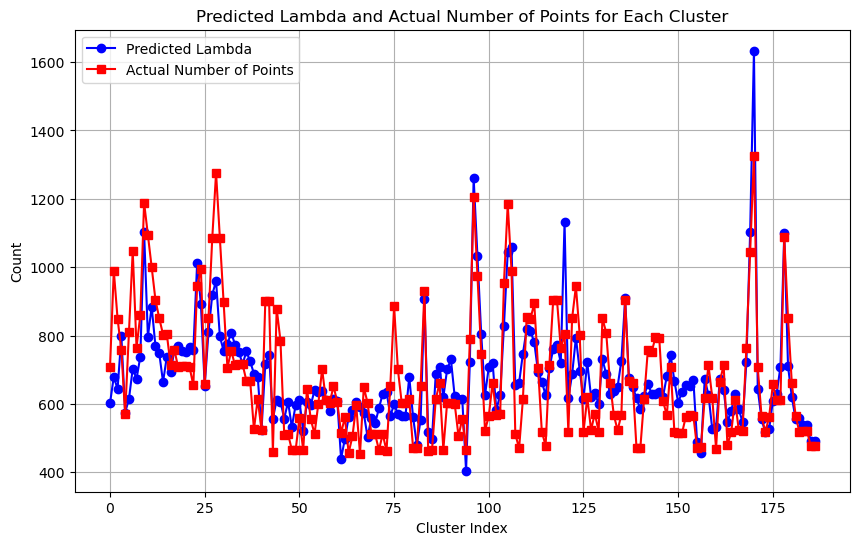

In [250]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming clusters_with_features_df contains your data
# The number of points in each cluster is the response variable
clusters_with_features_df['number_of_points'] = clusters_with_features_df['points'].apply(len)

# Define the response variable (number of points)
y = clusters_with_features_df['number_of_points']

# Define the explanatory variables (e.g., average speed, distance traveled)
# Select features to include in the model
X = clusters_with_features_df[['average_speed', 'distance_traveled', 'avg_height']]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# Predict the lambda (expected number of points) for each cluster
clusters_with_features_df['predicted_lambda'] = poisson_model.predict(X)

# Plot the predicted lambda and actual number of points for each cluster
plt.figure(figsize=(10, 6))

plt.plot(clusters_with_features_df.index, clusters_with_features_df['predicted_lambda'], marker='o', linestyle='-', color='b', label='Predicted Lambda')
plt.plot(clusters_with_features_df.index, clusters_with_features_df['number_of_points'], marker='s', linestyle='-', color='r', label='Actual Number of Points')

plt.title('Predicted Lambda and Actual Number of Points for Each Cluster')
plt.xlabel('Cluster Index')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


       window_start_time  event_count  lambda_mle  predicted_count  anomaly
0    2023-04-28 10:06:54           34    2.921248     1.231624e-24     True
1    2023-04-28 10:26:54           49    2.921248     5.755237e-42     True
2    2023-04-28 10:46:54           49    2.921248     5.755237e-42     True
3    2023-04-28 11:06:54           49    2.921248     5.755237e-42     True
4    2023-04-28 11:26:54           45    2.921248     4.018674e-37     True
...                  ...          ...         ...              ...      ...
4559 2023-06-30 17:46:54           11    2.921248     1.784081e-04     True
4560 2023-06-30 18:06:54           14    2.921248     2.036419e-06     True
4561 2023-06-30 18:26:54           10    2.921248     6.717983e-04     True
4562 2023-06-30 18:46:54           10    2.921248     6.717983e-04     True
4563 2023-06-30 19:06:54            7    2.921248     1.940288e-02     True

[509 rows x 5 columns]


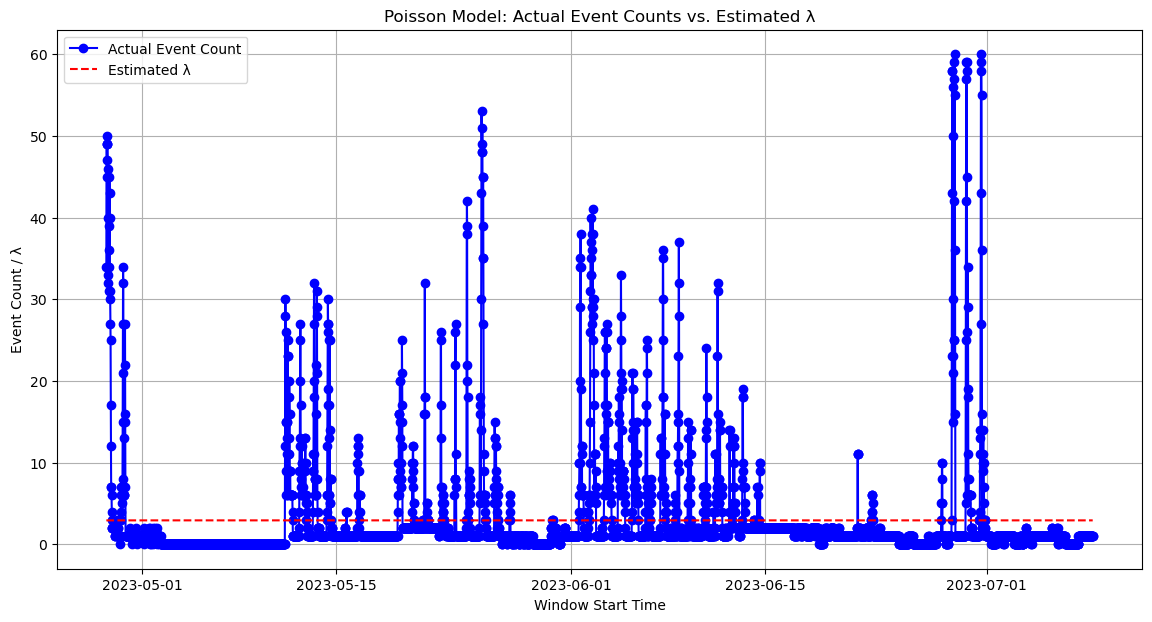

In [517]:
import pandas as pd
import numpy as np
from scipy.stats import poisson

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert epoch time in milliseconds to datetime
df['timestamp'] = pd.to_datetime(df['epoch']*1000, unit='ms')

# Define the sliding window in seconds (e.g., 10 minutes)
window_size = 60 * 60  # 10 minutes in seconds

# Define the step size for moving the window
step_size = 20 * 60  # 2 minutes in seconds

# Initialize lists to store window start times and event counts
window_start_times = []
event_counts = []

# Iterate through the data in sliding windows
start_time = df['timestamp'].min()
end_time = df['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    
    # Count the number of events (points) in the current window
    count_in_window = df[(df['timestamp'] >= start_time) & (df['timestamp'] < window_end_time)].shape[0]
    
    # Store the window start time and event count
    window_start_times.append(start_time)
    event_counts.append(count_in_window)
    
    # Move to the next window
    start_time = start_time + pd.Timedelta(seconds=step_size)

# Convert the lists to a DataFrame
window_df = pd.DataFrame({'window_start_time': window_start_times, 'event_count': event_counts})

# Calculate the mean event count (λ) across all windows
lambda_estimated = np.mean(event_counts)

# Validate Poisson distribution using MLE for λ
window_df['lambda_mle'] = lambda_estimated

# Calculate the predicted number of events using the Poisson distribution
window_df['predicted_count'] = poisson.pmf(window_df['event_count'], window_df['lambda_mle'])

# Identify potential anomalies where the actual count deviates significantly from the predicted count
window_df['anomaly'] = window_df.apply(lambda row: np.abs(row['event_count'] - row['lambda_mle']) > 2*np.sqrt(row['lambda_mle']), axis=1)

# Print the windows identified as anomalies
anomalies = window_df[window_df['anomaly']]
print(anomalies)

# Plot the actual event counts and the estimated λ
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(window_df['window_start_time'], window_df['event_count'], label='Actual Event Count', marker='o',color='blue')
plt.plot(window_df['window_start_time'], window_df['lambda_mle'], label='Estimated λ', linestyle='--', color='r')
plt.title('Poisson Model: Actual Event Counts vs. Estimated λ')
plt.xlabel('Window Start Time')
plt.ylabel('Event Count / λ')
plt.legend()
plt.grid(True)
plt.show()


The analysis identified anomalies in time intervals where the actual event count significantly deviated from the expected number based on the Poisson distribution. In this context, an anomaly was defined as a time window where the event count was more than two standard deviations away from the mean count (λ). The plot visually highlights these anomalies as red 'x' marks.

A total of 3,596 time intervals were flagged as anomalies, indicating periods where the bird movements deviated from what the model expected. This suggests that during these periods, either more or fewer birds were detected than anticipated, which could be due to various factors such as unusual bird behavior, environmental changes, or errors in data collection.

The time intervals with detected anomalies can be further investigated to understand the underlying causes and assess whether these deviations indicate significant events or patterns

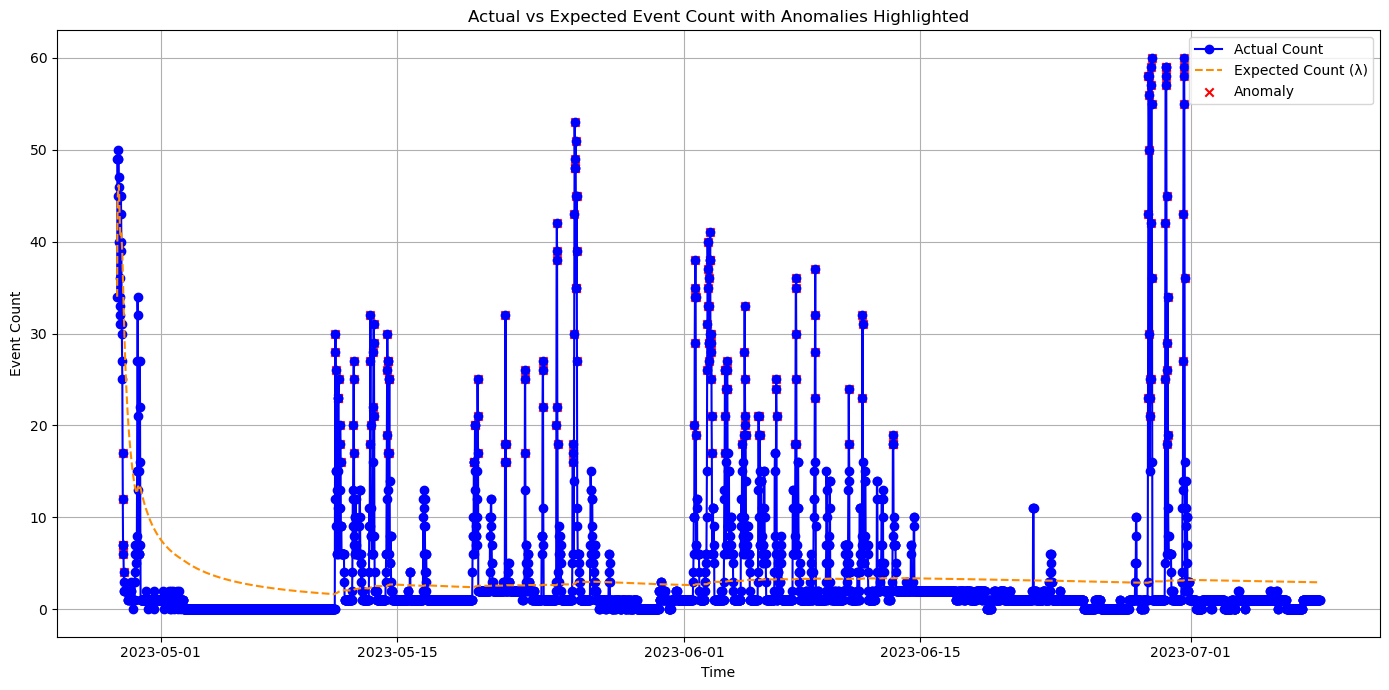

Anomalous time intervals:
            window_start  actual_count  expected_count  anomaly
23   2023-04-28 17:46:54            17       37.750000     True
24   2023-04-28 18:06:54            12       36.720000     True
25   2023-04-28 18:26:54             7       35.576923     True
26   2023-04-28 18:46:54             7       34.518519     True
27   2023-04-28 19:06:54             6       33.500000     True
...                  ...           ...             ...      ...
4548 2023-06-30 14:06:54            59        3.130798     True
4549 2023-06-30 14:26:54            58        3.142857     True
4550 2023-06-30 14:46:54            60        3.155350     True
4551 2023-06-30 15:06:54            55        3.166740     True
4552 2023-06-30 15:26:54            36        3.173951     True

[184 rows x 4 columns]


In [523]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Common_Kestrel_sample.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path)

# Convert timestamp column to datetime and sort the dataframe
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df_sorted = df.sort_values(by='timestamp').reset_index(drop=True)

# Define the sliding window size and step size in seconds
window_size = 60 * 60  # 60 minutes
step_size = 20 * 60  # 20 minutes

# Function to calculate lambda (average rate of events)
def calculate_lambda(event_counts):
    return np.mean(event_counts)

# Initialize lists to store results
window_starts = []
actual_counts = []
expected_counts = []
anomalies = []

# Iterate through the data in sliding windows
start_time = df_sorted['timestamp'].min()
end_time = df_sorted['timestamp'].max()

while start_time <= end_time:
    window_end_time = start_time + pd.Timedelta(seconds=window_size)
    window_df = df_sorted[(df_sorted['timestamp'] >= start_time) & (df_sorted['timestamp'] < window_end_time)]
    
    # Calculate the number of events (points) in the current window
    event_count = len(window_df)
    actual_counts.append(event_count)
    
    # Calculate the expected number of events (λ) for this window
    lambda_value = calculate_lambda(actual_counts)
    expected_counts.append(lambda_value)
    
    # Calculate standard deviation for anomaly detection
    std_dev = np.std(actual_counts)
    
    # Identify anomalies where the actual count deviates significantly from the expected count
    if abs(event_count - lambda_value) > 2 * std_dev:
        anomalies.append(True)
    else:
        anomalies.append(False)
    
    window_starts.append(start_time)
    
    # Move to the next window start time
    start_time = start_time + pd.Timedelta(seconds=step_size)

# Create a DataFrame to hold the results
results_df = pd.DataFrame({
    'window_start': window_starts,
    'actual_count': actual_counts,
    'expected_count': expected_counts,
    'anomaly': anomalies
})

# Plot the actual vs expected counts with anomalies highlighted
plt.figure(figsize=(14, 7))
plt.plot(results_df['window_start'], results_df['actual_count'], marker='o', linestyle='-', color='blue', label='Actual Count')
plt.plot(results_df['window_start'], results_df['expected_count'], linestyle='--', color='orange', label='Expected Count (λ)')
plt.scatter(results_df[results_df['anomaly']]['window_start'], results_df[results_df['anomaly']]['actual_count'], color='red', label='Anomaly', marker='x')
plt.xlabel('Time')
plt.ylabel('Event Count')
plt.title('Actual vs Expected Event Count with Anomalies Highlighted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the DataFrame showing where anomalies occurred
print("Anomalous time intervals:")
print(results_df[results_df['anomaly']])
